In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from random import choices
from random import sample
from scipy.special import comb
from scipy.stats import norm
from scipy import stats
import scipy.integrate as integrate
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. The Gaussian Assumption

Text(0, 0.5, 'Density')

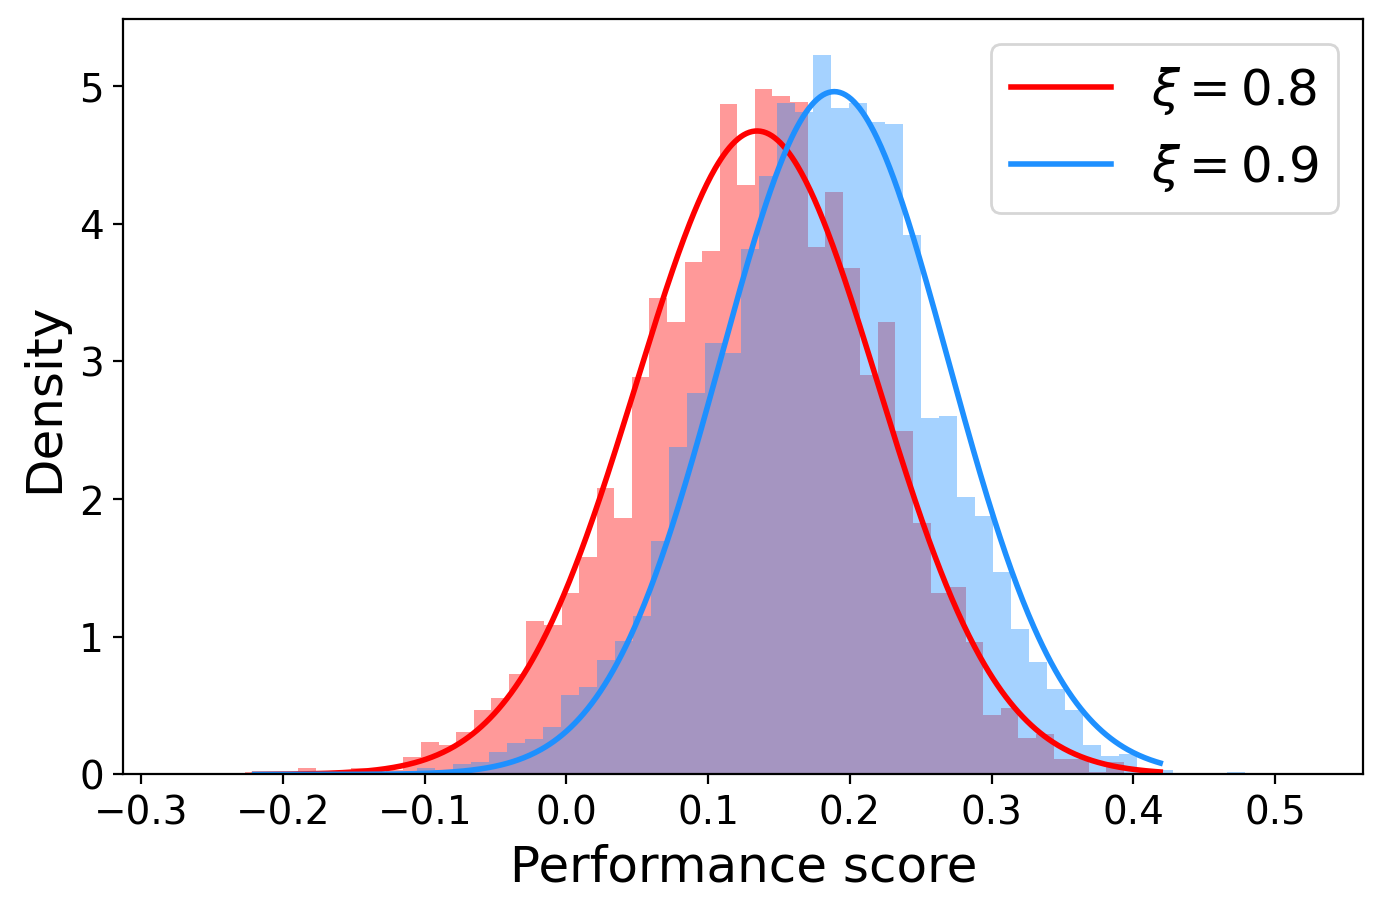

In [113]:
"""
W1
Load samples of performance score;
Fit the Gaussian model and compare the gaussian distribution with the empirical distribution
"""

n = 52
n0 = 5
m = 1000
mi = 100
T = 100
f = 0

plt.figure(figsize=(8,5), dpi= 200)
samples = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_samples.npy')
# samples have three dimensions, the first is 0: before effort deviation and 1: after effort deviation; the second dimension is effort level \xi; and the third dimension is the id of samples.
ax1 = sns.distplot(samples[0,39], bins = 50, color="red")
ax2 = sns.distplot(samples[0,44], bins = 50, color="dodgerblue")
ax1.get_lines()[0].remove()
ax2.get_lines()[0].remove()

mean_before = np.average(samples[0,39])
std_before = np.std(samples[0,39])
mean_after = np.average(samples[1,44])
std_after = np.std(samples[1,44])
x_axis = np.arange(-0.22,0.42,0.001)
plt.plot(x_axis, norm.pdf(x_axis, mean_before, std_before), linewidth = 2, color="red", label=r'$\xi = 0.8$')
plt.plot(x_axis, norm.pdf(x_axis, mean_after, std_after), linewidth = 2, color="dodgerblue", label=r'$\xi = 0.9$')
plt.legend(fontsize= 18)
plt.tick_params(labelsize=14)
plt.xlabel('Performance score', fontsize = 18)
plt.ylabel('Density', fontsize = 18)


Text(0, 0.5, 'Density')

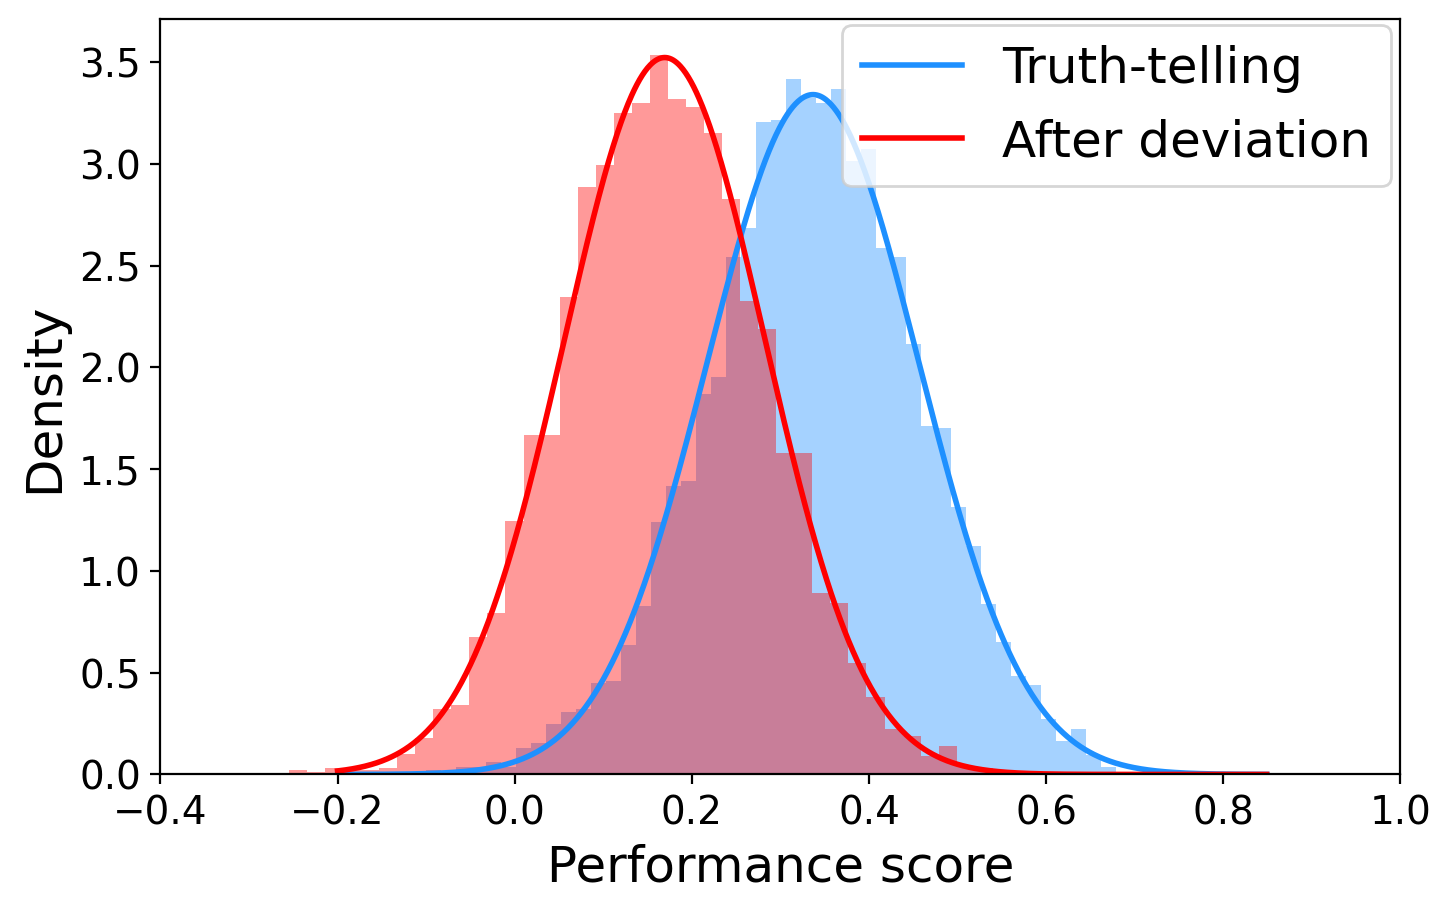

In [116]:
"""
W2
Load samples of performance score;
Fit the Gaussian model and compare the gaussian distribution with the empirical distribution
"""

n = 52
n0 = 5
m = 1000
mi = 103
check_p = 0.2
T = 100
f = 0
e = 2 # effort index
s = 0 # strategy_index

plt.figure(figsize=(8,5), dpi= 200)
samples = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_samples.npy')
samples_d = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_samples_deviate.npy')
# samples have three dimensions, the first is 0: before effort deviation and 1: after effort deviation; the second dimension is effort level \xi; and the third dimension is the id of samples.
ax1 = sns.distplot(samples[e], bins = 50, color="dodgerblue")
ax2 = sns.distplot(samples_d[e,s], bins = 50, color="red")
ax1.get_lines()[0].remove()
ax2.get_lines()[0].remove()

mean_before = np.average(samples[e])
std_before = np.std(samples[e])
mean_after = np.average(samples_d[e,s])
std_after = np.std(samples_d[e,s])
x_axis = np.arange(-0.2,0.85,0.001)
plt.plot(x_axis, norm.pdf(x_axis, mean_before, std_before), linewidth = 2, color="dodgerblue", label='Truth-telling')
plt.plot(x_axis, norm.pdf(x_axis, mean_after, std_after), linewidth = 2, color="red", label='After deviation')
plt.legend(fontsize= 18, loc = (0.55,0.78))
plt.tick_params(labelsize=14)
plt.xlim(-0.4,1)
plt.xlabel('Performance score', fontsize = 18)
plt.ylabel('Density', fontsize = 18)


# 2. The Sensitivity of Performance Measurements

Under the Gaussian model, the sensitivity of a performance measurement is determined by the mean and the standard deviation (std) of its score distribution. We first estimate the mean and the std and plot the sensitivity in a straightforward way.

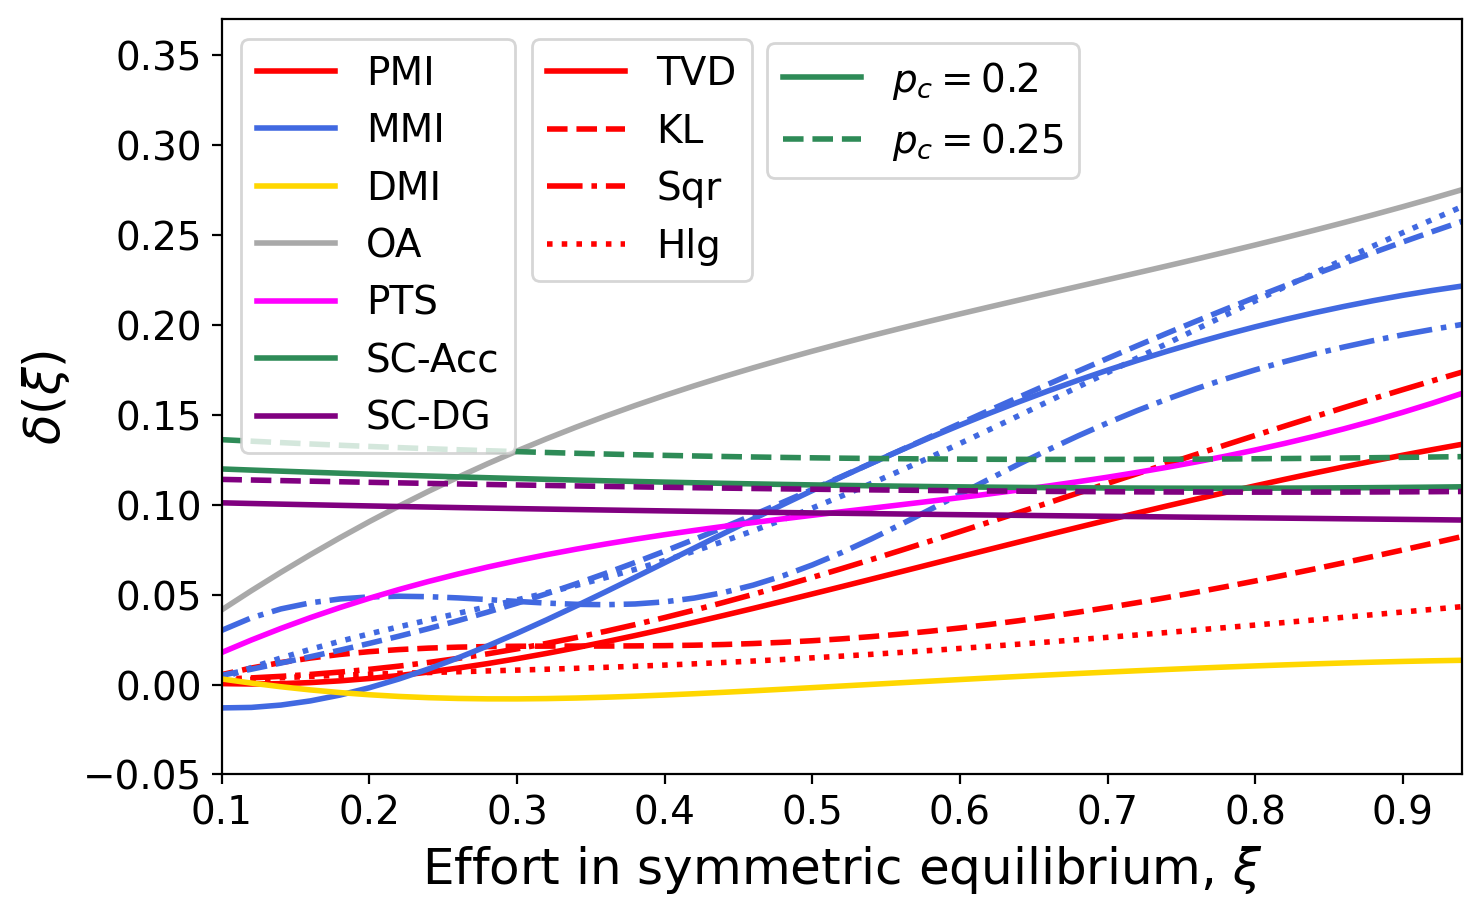

In [2]:
"""
W1
Load the generated samples (or the mean or std of the samples);
Estimate and smoothen the sensitivity \delta of each performance measurements;
Plot the curves.
"""

n = 52
n0 = 5
m = 1000
mi = 100
T = 100

plt.figure(figsize=(8,5), dpi= 200)
LST = ['-','dashed','-.',':']
Mechanism_name = ['TVD','KL','Sqr','Hlg']
Effort_list = np.arange(0,0.95,0.02)
Mechanisms = ['tvd','kl','sqr','hlg']

def Fitted_function(x, para):
    return para[0]*np.power(x,3)+para[1]*np.power(x,2)+para[2]*np.power(x,1)+para[3]

################################# PMI
for f in range(4):
    mean_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean.npy')
    std_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance.npy')
    mean_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate.npy')
    std_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance_deviate.npy')
    para_m1 = np.polyfit(Effort_list, mean_1, 3)
    para_m2 = np.polyfit(Effort_list, mean_2, 3)
    para_v1 = np.polyfit(Effort_list, std_1, 3)
    para_v2 = np.polyfit(Effort_list, std_2, 3)

    delta = (Fitted_function(Effort_list, para_m2) - Fitted_function(Effort_list, para_m1))/Fitted_function(Effort_list, para_v1)
    if f == 0:
        l_PMI_0, = plt.plot(Effort_list, delta, color = 'red', linestyle = LST[f],linewidth = 2, label=Mechanism_name[f]+'-PMI')
    elif f == 1:
        l_PMI_1, = plt.plot(Effort_list, delta, color = 'red', linestyle = LST[f],linewidth = 2, label=Mechanism_name[f]+'-PMI')
    elif f == 2:
        l_PMI_2, = plt.plot(Effort_list, delta, color = 'red', linestyle = LST[f],linewidth = 2, label=Mechanism_name[f]+'-PMI')
    elif f == 3:
        l_PMI_3, = plt.plot(Effort_list, delta, color = 'red', linestyle = LST[f],linewidth = 2, label=Mechanism_name[f]+'-PMI')

        
################################# MMI
for f in range(4):
    mean_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean.npy')
    std_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance.npy')
    mean_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate.npy')
    std_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance_deviate.npy')
    para_m1 = np.polyfit(Effort_list, mean_1, 3)
    para_m2 = np.polyfit(Effort_list, mean_2, 3)
    para_v1 = np.polyfit(Effort_list, std_1, 3)
    para_v2 = np.polyfit(Effort_list, std_2, 3)

    delta = (Fitted_function(Effort_list, para_m2) - Fitted_function(Effort_list, para_m1))/Fitted_function(Effort_list, para_v1)
    if f == 0:
        l_MMI_0, = plt.plot(Effort_list, delta, color = 'royalblue',linewidth = 2, linestyle = LST[f], label='MMI')
    else:
        plt.plot(Effort_list, delta, color = 'royalblue',linewidth = 2, linestyle = LST[f])

        
################################# DMI
mean_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
std_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
mean_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')
para_m1 = np.polyfit(Effort_list, mean_1, 3)
para_m2 = np.polyfit(Effort_list, mean_2, 3)
para_v1 = np.polyfit(Effort_list, std_1, 3)
para_v2 = np.polyfit(Effort_list, std_2, 3)

delta = (Fitted_function(Effort_list, para_m2) - Fitted_function(Effort_list, para_m1))/Fitted_function(Effort_list, para_v1)
l_DMI, = plt.plot(Effort_list, delta, color = 'gold',linewidth = 2, label='DMI')


################################# OA
mean_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
std_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
mean_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')
para_m1 = np.polyfit(Effort_list, mean_1, 3)
para_m2 = np.polyfit(Effort_list, mean_2, 3)
para_v1 = np.polyfit(Effort_list, std_1, 3)
para_v2 = np.polyfit(Effort_list, std_2, 3)

delta = (Fitted_function(Effort_list, para_m2) - Fitted_function(Effort_list, para_m1))/Fitted_function(Effort_list, para_v1)
l_OA, = plt.plot(Effort_list, delta, color = 'darkgrey',linewidth = 2, label='OA')


################################# PTS
mean_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
std_1 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
mean_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std_2 = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')
para_m1 = np.polyfit(Effort_list, mean_1, 3)
para_m2 = np.polyfit(Effort_list, mean_2, 3)
para_v1 = np.polyfit(Effort_list, std_1, 3)
para_v2 = np.polyfit(Effort_list, std_2, 3)

delta = (Fitted_function(Effort_list, para_m2) - Fitted_function(Effort_list, para_m1))/Fitted_function(Effort_list, para_v1)
l_PTS, = plt.plot(Effort_list, delta, color = 'magenta',linewidth = 2, label='PTS')

    
################################# SC-Acc
check_p = 0.2
Effort_list = np.arange(0,1,0.02)
mean = np.load('Samples/Effort_equilibrium/W1/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
std = np.load('Samples/Effort_equilibrium/W1/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')
para_m = np.polyfit(Effort_list, mean,3)
para_v = np.polyfit(Effort_list, std, 3)

delta = (Fitted_function(Effort_list+0.04, para_m) - Fitted_function(Effort_list, para_m))/Fitted_function(Effort_list, para_v)
l_acc_2, = plt.plot(Effort_list, delta, color = 'seagreen',linewidth = 2, label=r'SC-Acc, $p_c=0.2$')
    
    
check_p = 0.25
mean = np.load('Samples/Effort_equilibrium/W1/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
variance = np.load('Samples/Effort_equilibrium/W1/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')
para_m = np.polyfit(Effort_list, mean,3)
para_v = np.polyfit(Effort_list, variance, 3)

delta = (Fitted_function(Effort_list+0.04, para_m) - Fitted_function(Effort_list, para_m))/Fitted_function(Effort_list, para_v)
l_acc_25, = plt.plot(Effort_list, delta, color = 'seagreen',linewidth = 2, linestyle = '--', label=r'SC-Acc, $p_c=0.25$')


################################# SC-DG
check_p = 0.2
mean = np.load('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
variance = np.load('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')
para_m = np.polyfit(Effort_list, mean,3)
para_v = np.polyfit(Effort_list, variance, 3)

delta = (Fitted_function(Effort_list+0.04, para_m) - Fitted_function(Effort_list, para_m))/Fitted_function(Effort_list, para_v)
l_DG_2, = plt.plot(Effort_list, delta, color = 'purple',linewidth = 2, label=r'SC-DG')


check_p = 0.25
mean = np.load('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
variance = np.load('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')
para_m = np.polyfit(Effort_list, mean,3)
para_v = np.polyfit(Effort_list, variance, 3)

delta = (Fitted_function(Effort_list+0.04, para_m) - Fitted_function(Effort_list, para_m))/Fitted_function(Effort_list, para_v)
l_DG_25, = plt.plot(Effort_list, delta, color = 'purple',linewidth = 2, linestyle = '--')
    
    
    
plt.tick_params(labelsize=14)
plt.xlabel(r'Effort in symmetric equilibrium, $\xi$', fontsize = 18)
plt.ylabel(r'$\delta(\xi)$', fontsize = 18)
plt.ylim(-0.05,0.37)
plt.xlim(0.1,0.94)

legend1 = plt.legend([l_PMI_0, l_MMI_0, l_DMI, l_OA, l_PTS, l_acc_2, l_DG_2], ['PMI', 'MMI', 'DMI', 'OA', 'PTS', 'SC-Acc','SC-DG'], fontsize=14)
legend2 = plt.legend([l_acc_2, l_acc_25], [r'$p_c=0.2$',r'$p_c=0.25$'], fontsize=14, loc = (0.44,0.79))
plt.legend([l_PMI_0, l_PMI_1, l_PMI_2, l_PMI_3], Mechanism_name, fontsize=14, loc = (0.25,0.654))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)



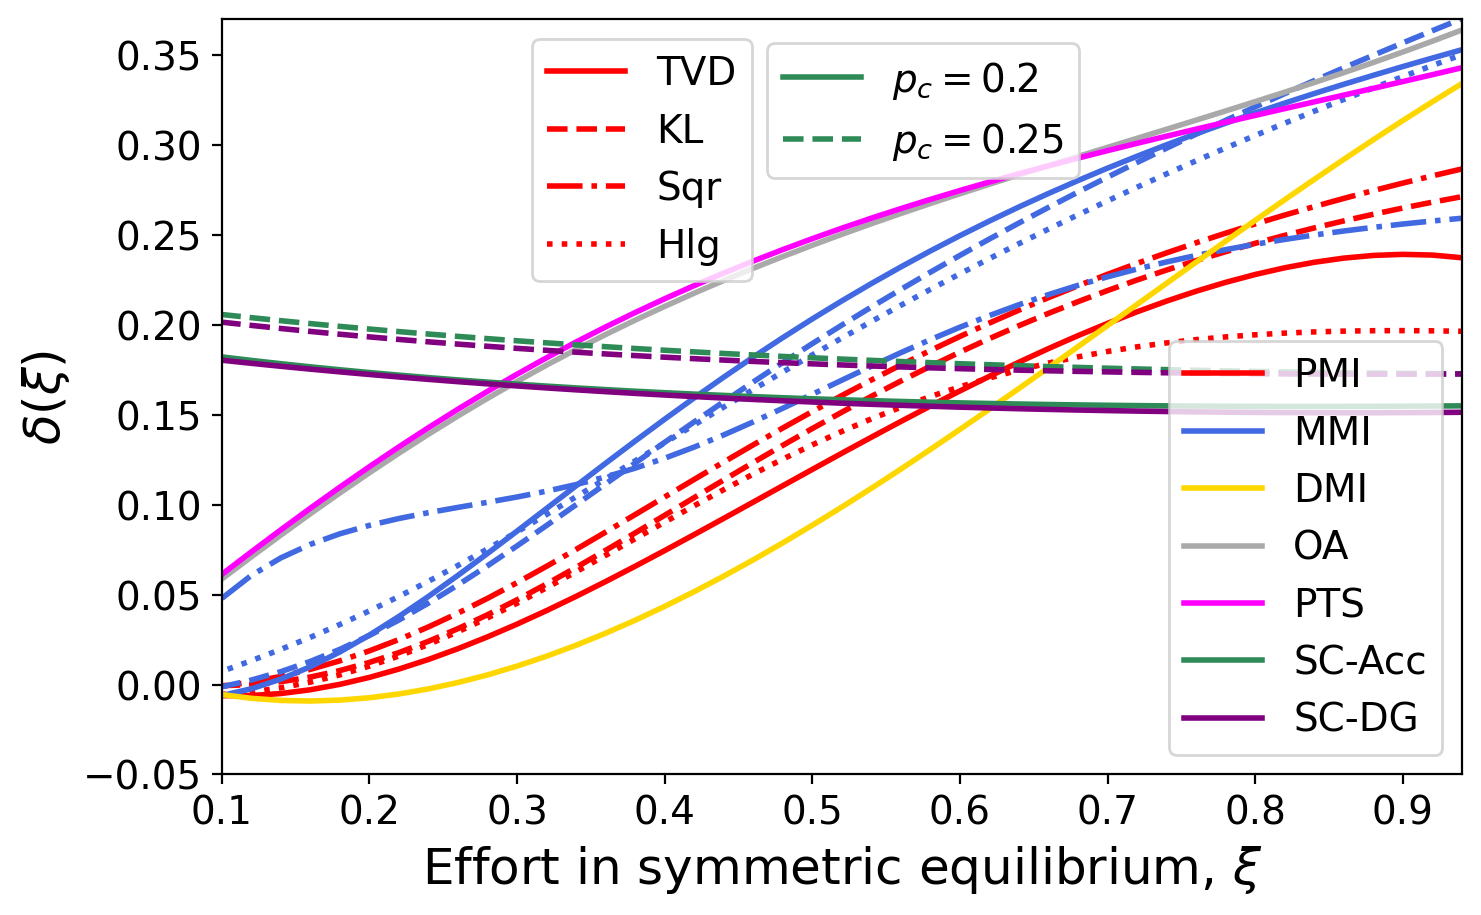

In [34]:
"""
W2
"""
n = 52
n0 = 5
m = 1000
mi = 100
T = 100

plt.figure(figsize=(8,5), dpi= 200)
LST = ['-','dashed','-.',':']
Mechanism_name = ['TVD','KL','Sqr','Hlg']
Effort_list = np.arange(0,0.95,0.02)
Mechanisms = ['tvd','kl','sqr','hlg']

def Fitted_function(x, para):
    return para[0]*np.power(x,3)+para[1]*np.power(x,2)+para[2]*np.power(x,1)+para[3]

################################# PMI
for f in range(4):
    mean_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean.npy')
    std_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance.npy')
    mean_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate.npy')
    std_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance_deviate.npy')
    para_m1 = np.polyfit(Effort_list, mean_1, 3)
    para_m2 = np.polyfit(Effort_list, mean_2, 3)
    para_v1 = np.polyfit(Effort_list, std_1, 3)
    para_v2 = np.polyfit(Effort_list, std_2, 3)

    delta = (Fitted_function(Effort_list, para_m2) - Fitted_function(Effort_list, para_m1))/Fitted_function(Effort_list, para_v1)
    if f == 0:
        l_PMI_0, = plt.plot(Effort_list, delta, color = 'red', linestyle = LST[f],linewidth = 2, label=Mechanism_name[f]+'-PMI')
    elif f == 1:
        l_PMI_1, = plt.plot(Effort_list, delta, color = 'red', linestyle = LST[f],linewidth = 2, label=Mechanism_name[f]+'-PMI')
    elif f == 2:
        l_PMI_2, = plt.plot(Effort_list, delta, color = 'red', linestyle = LST[f],linewidth = 2, label=Mechanism_name[f]+'-PMI')
    elif f == 3:
        l_PMI_3, = plt.plot(Effort_list, delta, color = 'red', linestyle = LST[f],linewidth = 2, label=Mechanism_name[f]+'-PMI')

        
################################# MMI
for f in range(4):
    mean_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean.npy')
    std_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance.npy')
    mean_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate.npy')
    std_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance_deviate.npy')
    para_m1 = np.polyfit(Effort_list, mean_1, 3)
    para_m2 = np.polyfit(Effort_list, mean_2, 3)
    para_v1 = np.polyfit(Effort_list, std_1, 3)
    para_v2 = np.polyfit(Effort_list, std_2, 3)

    delta = (Fitted_function(Effort_list, para_m2) - Fitted_function(Effort_list, para_m1))/Fitted_function(Effort_list, para_v1)
    if f == 0:
        l_MMI_0, = plt.plot(Effort_list, delta, color = 'royalblue',linewidth = 2, linestyle = LST[f], label='MMI')
    else:
        plt.plot(Effort_list, delta, color = 'royalblue',linewidth = 2, linestyle = LST[f])

        
################################# DMI
mean_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
std_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
mean_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

para = np.polyfit(Effort_list, (mean_2 - mean_1)/std_1, 3)
delta = Fitted_function(Effort_list, para)
l_DMI, = plt.plot(Effort_list, delta, color = 'gold',linewidth = 2, label='DMI')


################################# OA
mean_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
std_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
mean_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')
para_m1 = np.polyfit(Effort_list, mean_1, 3)
para_m2 = np.polyfit(Effort_list, mean_2, 3)
para_v1 = np.polyfit(Effort_list, std_1, 3)
para_v2 = np.polyfit(Effort_list, std_2, 3)

delta = (Fitted_function(Effort_list, para_m2) - Fitted_function(Effort_list, para_m1))/Fitted_function(Effort_list, para_v1)
l_OA, = plt.plot(Effort_list, delta, color = 'darkgrey',linewidth = 2, label='OA')


################################# PTS
mean_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
std_1 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
mean_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std_2 = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')
para_m1 = np.polyfit(Effort_list, mean_1, 3)
para_m2 = np.polyfit(Effort_list, mean_2, 3)
para_v1 = np.polyfit(Effort_list, std_1, 3)
para_v2 = np.polyfit(Effort_list, std_2, 3)

delta = (Fitted_function(Effort_list, para_m2) - Fitted_function(Effort_list, para_m1))/Fitted_function(Effort_list, para_v1)
l_PTS, = plt.plot(Effort_list, delta, color = 'magenta',linewidth = 2, label='PTS')

    
################################# SC-Acc
check_p = 0.2
Effort_list = np.arange(0,1,0.02)
mean = np.load('Samples/Effort_equilibrium/W2/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
std = np.load('Samples/Effort_equilibrium/W2/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')
para_m = np.polyfit(Effort_list, mean,3)
para_v = np.polyfit(Effort_list, std, 3)

delta = (Fitted_function(Effort_list+0.04, para_m) - Fitted_function(Effort_list, para_m))/Fitted_function(Effort_list, para_v)
l_acc_2, = plt.plot(Effort_list, delta, color = 'seagreen',linewidth = 2, label=r'SC-Acc, $p_c=0.2$')
    
    
check_p = 0.25
mean = np.load('Samples/Effort_equilibrium/W2/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
variance = np.load('Samples/Effort_equilibrium/W2/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')
para_m = np.polyfit(Effort_list, mean,3)
para_v = np.polyfit(Effort_list, variance, 3)

delta = (Fitted_function(Effort_list+0.04, para_m) - Fitted_function(Effort_list, para_m))/Fitted_function(Effort_list, para_v)
l_acc_25, = plt.plot(Effort_list, delta, color = 'seagreen',linewidth = 2, linestyle = '--', label=r'SC-Acc, $p_c=0.25$')


################################# SC-DG
check_p = 0.2
mean = np.load('Samples/Effort_equilibrium/W2/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
variance = np.load('Samples/Effort_equilibrium/W2/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')
para_m = np.polyfit(Effort_list, mean,3)
para_v = np.polyfit(Effort_list, variance, 3)

delta = (Fitted_function(Effort_list+0.04, para_m) - Fitted_function(Effort_list, para_m))/Fitted_function(Effort_list, para_v)
l_DG_2, = plt.plot(Effort_list, delta, color = 'purple',linewidth = 2, label=r'SC-DG')


check_p = 0.25
mean = np.load('Samples/Effort_equilibrium/W2/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
variance = np.load('Samples/Effort_equilibrium/W2/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')
para_m = np.polyfit(Effort_list, mean,3)
para_v = np.polyfit(Effort_list, variance, 3)

delta = (Fitted_function(Effort_list+0.04, para_m) - Fitted_function(Effort_list, para_m))/Fitted_function(Effort_list, para_v)
l_DG_25, = plt.plot(Effort_list, delta, color = 'purple',linewidth = 2, linestyle = '--')
    
    
    
plt.tick_params(labelsize=14)
plt.xlabel(r'Effort in symmetric equilibrium, $\xi$', fontsize = 18)
plt.ylabel(r'$\delta(\xi)$', fontsize = 18)
plt.ylim(-0.05,0.37)
plt.xlim(0.1,0.94)

legend1 = plt.legend([l_PMI_0, l_MMI_0, l_DMI, l_OA, l_PTS, l_acc_2, l_DG_2], ['PMI', 'MMI', 'DMI', 'OA', 'PTS', 'SC-Acc','SC-DG'], fontsize=14)
legend2 = plt.legend([l_acc_2, l_acc_25], [r'$p_c=0.2$',r'$p_c=0.25$'], fontsize=14, loc = (0.44,0.79))
plt.legend([l_PMI_0, l_PMI_1, l_PMI_2, l_PMI_3], Mechanism_name, fontsize=14, loc = (0.25,0.654))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)



# 3. Minimum Payment with KDE

Instead of just estimating the mean and the standard deviation, we estimate the distribution of performance scores with nonparametric model---Kernel Density Estimation (KDE)---and compute the minimum payment for each of the performance measurements.

## 2.1 Estimate the Gain of Ranking Probability After Deviation

In [ ]:
def prob_i(p1,p2,i):
    """
    Input: "p1" and "p2" are two kernels that correspond to the score distributions before and after deviation respectively;
           "i" is the rank of the agent (1<=i<=n)
    Output: the probability of the agent being ranked in the i'th place after deviation.
    """
    PS_1_cdf = np.vectorize(lambda x: p1.integrate_box_1d(-np.inf, x)) # The cdf of every
    def PS_2_pdf(x):
        return p2(x)
    return integrate.quad(lambda x: PS_2_pdf(x)*np.power(PS_1_cdf(x), n-i)*np.power(1 - PS_1_cdf(x), i-1)*comb(n-1,i-1), -np.inf, np.inf)[0]

mi = 100
n0 = 5
m = 1000
n = math.ceil(m*n0/(mi - 2))
T = 100
Effort_list = np.arange(0,0.97,0.02)

################### PMI
for f in range(4):
    print("PMI", f)
    Data = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_samples.npy')
    p_i = np.zeros((len(Effort_list),n))
    for j,xi in enumerate(Effort_list):
        samples_1 = Data[0,j]
        samples_2 = Data[1,j]
        kernel_1 = stats.gaussian_kde(samples_1)
        kernel_2 = stats.gaussian_kde(samples_2)
        for i in range(n):
            p_i[j,i] = prob_i(kernel_1,kernel_2,i+1)
    np.save('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_pi.npy',p_i)

################### MMI
for f in range(4):
    print("MMI", f)
    Data = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_samples.npy')
    p_i = np.zeros((len(Effort_list),n))
    for j,xi in enumerate(Effort_list):
        samples_1 = Data[0,j]
        samples_2 = Data[1,j]
        kernel_1 = stats.gaussian_kde(samples_1)
        kernel_2 = stats.gaussian_kde(samples_2)
        for i in range(n):
            p_i[j,i] = prob_i(kernel_1,kernel_2,i+1)
    np.save('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_pi.npy',p_i)
    
################### DMI
print("DMI")
Data = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_samples.npy')
p_i = np.zeros((len(Effort_list),n))
for j,xi in enumerate(Effort_list):
    samples_1 = Data[0,j]*1e15
    samples_2 = Data[1,j]*1e15
    kernel_1 = stats.gaussian_kde(samples_1)
    kernel_2 = stats.gaussian_kde(samples_2)
    for i in range(n):
        p_i[j,i] = prob_i(kernel_1,kernel_2,i+1)
np.save('Samples/Effort_equilibrium/W1/Peer_prediction_DIM/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_pi.npy',p_i)

################### OA
print("OA")
Data = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_samples.npy')
p_i = np.zeros((len(Effort_list),n))
for j,xi in enumerate(Effort_list):
    samples_1 = Data[0,j]
    samples_2 = Data[1,j]
    kernel_1 = stats.gaussian_kde(samples_1)
    kernel_2 = stats.gaussian_kde(samples_2)
    for i in range(n):
        p_i[j,i] = prob_i(kernel_1,kernel_2,i+1)
np.save('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_pi.npy',p_i)

################### PTS
print("PTS")
Data = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_samples.npy')
p_i = np.zeros((len(Effort_list),n))
for j,xi in enumerate(Effort_list):
    samples_1 = Data[0,j]
    samples_2 = Data[1,j]
    kernel_1 = stats.gaussian_kde(samples_1)
    kernel_2 = stats.gaussian_kde(samples_2)
    for i in range(n):
        p_i[j,i] = prob_i(kernel_1,kernel_2,i+1)
np.save('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_pi.npy',p_i)

################### SC_acc
Effort_list = np.arange(0,0.96,0.02)
for check_prob in [0.2,0.3]:
    print("SC_acc",check_prob)
    Data = np.load('Samples/Effort_equilibrium/W1/Spot_check_acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples.npy')
    p_i = np.zeros((len(Effort_list),n))
    for j,xi in enumerate(Effort_list):
        samples_1 = Data[j]
        kernel_1 = stats.gaussian_kde(samples_1)
        samples_2 = Data[j+2]
        kernel_2 = stats.gaussian_kde(samples_2)
        for i in range(n):
            p_i[j,i] = prob_i(kernel_1,kernel_2,i+1)
    np.save('Samples/Effort_equilibrium/W1/Spot_check_acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_pi.npy',p_i)

################### SC_DG
Effort_list = np.arange(0,0.96,0.02)
for check_prob in [0.2,0.3]:
    print("SC_SG",check_prob)
    Data = np.load('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples.npy')
    p_i = np.zeros((len(Effort_list),n))
    for j,xi in enumerate(Effort_list):
        samples_1 = Data[j]
        kernel_1 = stats.gaussian_kde(samples_1)
        samples_2 = Data[j+2]
        kernel_2 = stats.gaussian_kde(samples_2)
        for i in range(n):
            p_i[j,i] = prob_i(kernel_1,kernel_2,i+1)
    np.save('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_pi.npy',p_i)


## 2.2 Compute The Minimum Payments

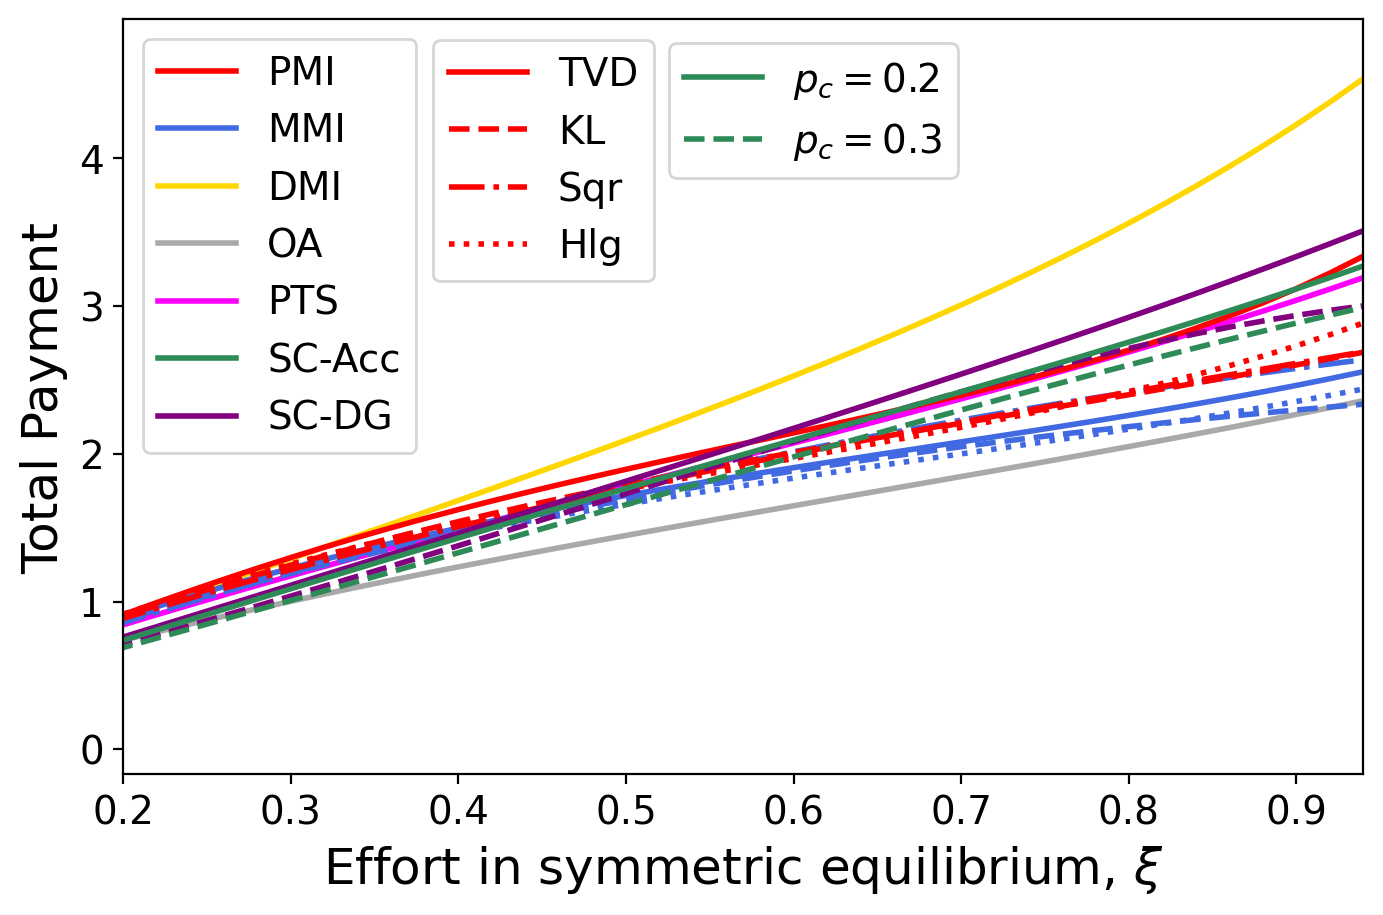

In [90]:
"""
WTA
"""

def Fitted_function(x, para):
        return para[0]*np.power(x,3)+para[1]*np.power(x,2)+para[2]*np.power(x,1)+para[3]
    
def cost(e):
    """
    Input: "e" is an agent's effort;
    Output: cost of effort
    """
    return np.power(e,2)

Effort_list = np.arange(0,0.97,0.02)
dc = np.zeros(len(Effort_list))
for j,xi in enumerate(Effort_list):
    dc[j] = cost(xi+0.04) - cost(xi)
    
n = 52
m = 1000
mi = 100
n0 = 5
T = 100
LST = ['-','dashed','-.',':']
Mechanism_name = ['TVD','KL','Sqr','Hlg']
Mechanisms = ['tvd','kl','sqr','hlg']

plt.figure(figsize=(8,5), dpi= 200)
p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_pi.npy')
para = np.polyfit(Effort_list[:], p_i[:,0], 3)
dp = Fitted_function(Effort_list, para) 
t1 = dc/dp # Payment of WTA
l_PTS ,= plt.plot(Effort_list,t1,color = 'magenta',linewidth = 2)

p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_pi.npy')
para = np.polyfit(Effort_list, p_i[:,0], 3)
dp = Fitted_function(Effort_list, para)
t1 = dc/dp
l_OA ,= plt.plot(Effort_list,t1,color = 'darkgrey',linewidth = 2)

p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_pi.npy')
para = np.polyfit(Effort_list, p_i[:,0], 3)
dp = Fitted_function(Effort_list, para)
t1 = dc/dp
l_DMI ,= plt.plot(Effort_list,t1,color = 'gold',linewidth = 2)

for f in range(4):
    p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_pi.npy')
    para = np.polyfit(Effort_list, p_i[:,0], 3)
    dp = Fitted_function(Effort_list, para)
    t1 = dc/dp
    if f == 0:
        l_MMI_0 ,= plt.plot(Effort_list,t1,color = 'royalblue',linestyle = LST[f],linewidth = 2)
    elif f == 1:
        l_MMI_1 ,= plt.plot(Effort_list,t1,color = 'royalblue',linestyle = LST[f],linewidth = 2)
    elif f == 2:
        l_MMI_2 ,= plt.plot(Effort_list,t1,color = 'royalblue',linestyle = LST[f],linewidth = 2)
    elif f == 3:
        l_MMI_3 ,= plt.plot(Effort_list,t1,color = 'royalblue',linestyle = LST[f],linewidth = 2)
    
for f in range(4):
    p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_pi.npy')
    para = np.polyfit(Effort_list, p_i[:,0], 3)
    dp = Fitted_function(Effort_list, para)
    t1 = dc/dp
    if f == 0:
        l_PMI_0 ,= plt.plot(Effort_list,t1,color = 'red',linestyle = LST[f],linewidth = 2)
    elif f == 1:
        l_PMI_1 ,= plt.plot(Effort_list,t1,color = 'red',linestyle = LST[f],linewidth = 2)
    elif f == 2:
        l_PMI_2 ,= plt.plot(Effort_list,t1,color = 'red',linestyle = LST[f],linewidth = 2)
    elif f == 3:
        l_PMI_3 ,= plt.plot(Effort_list,t1,color = 'red',linestyle = LST[f],linewidth = 2)

Effort_list = np.arange(0,0.95,0.02)
dc = np.zeros(len(Effort_list))
for j,xi in enumerate(Effort_list):
    dc[j] = cost(xi+0.04) - cost(xi)
for check_prob in [0.2,0.3]:
    p_i = np.load('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_pi.npy')
    para = np.polyfit(Effort_list, p_i[:,0], 3)
    dp = Fitted_function(Effort_list, para)
    t1 = dc/dp
    if check_prob == 0.2:
        l_DG_2 ,= plt.plot(Effort_list,t1,color = 'purple',linewidth = 2)
    elif check_prob == 0.3:
        l_DG_3 ,= plt.plot(Effort_list,t1,color = 'purple',linestyle = '--',linewidth = 2)
    
for check_prob in [0.2,0.3]:
    p_i = np.load('Samples/Effort_equilibrium/W1/Spot_check_acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_pi.npy')
    para = np.polyfit(Effort_list, p_i[:,0], 3)
    dp = Fitted_function(Effort_list, para)
    t1 = dc/dp
    if check_prob == 0.2:
        l_acc_2 ,= plt.plot(Effort_list,t1,color = 'seagreen',linewidth = 2)
    elif check_prob == 0.3:
        l_acc_3 ,= plt.plot(Effort_list,t1,color = 'seagreen',linestyle = '--',linewidth = 2)
        
plt.tick_params(labelsize=14)
plt.xlabel(r'Effort in symmetric equilibrium, $\xi$', fontsize = 18)
plt.ylabel(r'Total Payment', fontsize = 18)
# plt.ylim(-0.3,0.65)
plt.xlim(0.2,0.94)

legend1 = plt.legend([l_PMI_0, l_MMI_0, l_DMI, l_OA, l_PTS, l_acc_2, l_DG_2], ['PMI', 'MMI', 'DMI', 'OA', 'PTS', 'SC-Acc','SC-DG'], fontsize=14)
legend2 = plt.legend([l_acc_2, l_acc_3], [r'$p_c=0.2$',r'$p_c=0.3$'], fontsize=14, loc = (0.44,0.79))
plt.legend([l_PMI_0, l_PMI_1, l_PMI_2, l_PMI_3], Mechanism_name, fontsize=14, loc = (0.25,0.653))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


In [103]:
n = 52
Effort_list = np.arange(0,0.97,0.02)
p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_pi.npy')
dp = p_i[:,0] - 1/n

print(dp)


[-9.87994916e-04 -1.51557234e-05 -2.37723186e-03  5.49334582e-04
 -7.76878789e-04 -7.37696435e-04  1.00407542e-03  1.14656247e-03
 -6.02985208e-04  8.36014421e-05 -1.90538444e-03  1.36559698e-04
  4.31853987e-04  2.99565139e-03  3.19287816e-03  2.66941260e-03
  3.79372959e-03 -1.17080062e-03  3.30209730e-03  5.76506490e-03
  6.33424447e-03  2.32618143e-03  6.12965403e-03  4.79687639e-03
  4.85917867e-03  4.91122806e-03  8.34126169e-03  2.87547536e-03
  4.53473644e-03  6.84857024e-03  8.06884063e-03  9.24805510e-03
  6.55418379e-03  8.39399771e-03  1.39640781e-02  1.30936095e-02
  9.26796973e-03  1.11172380e-02  1.13605158e-02  9.06180226e-03
  1.00982453e-02  8.24422762e-03  1.81259746e-02  8.18822313e-03
  9.50765663e-03  8.92903184e-03  1.27986456e-02  1.38291495e-02
  1.37660199e-02]


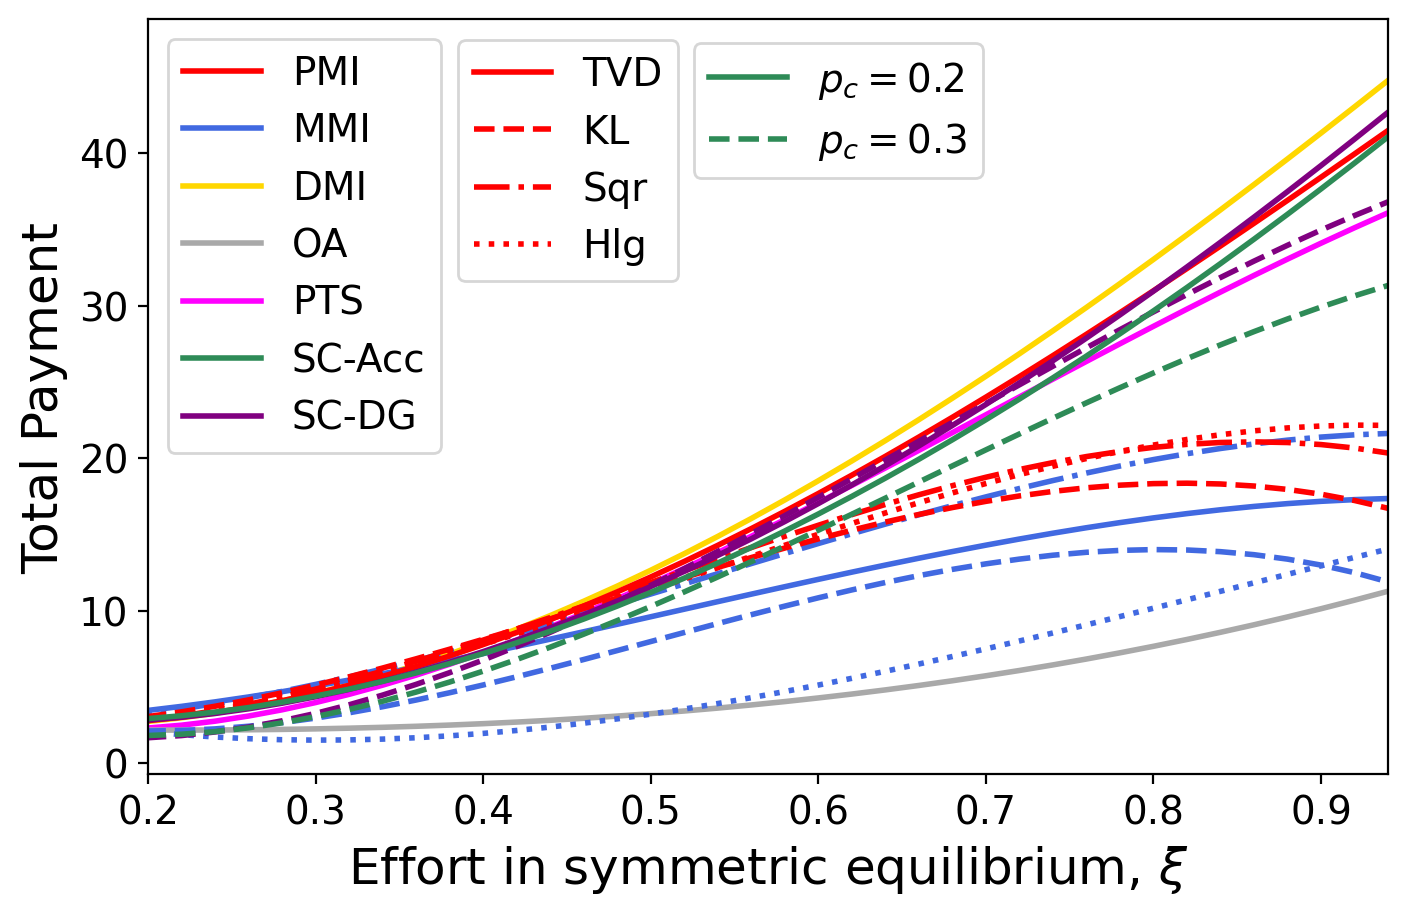

In [92]:
"""
WTM
"""
rho = 0.5
def Fitted_function(x, para):
        return para[0]*np.power(x,3)+para[1]*np.power(x,2)+para[2]*np.power(x,1)+para[3]
def cost(x):
    return np.power(x,2)
Effort_list = np.arange(0,0.97,0.02)
dc = np.zeros(len(Effort_list))
for j,xi in enumerate(Effort_list):
    dc[j] = cost(xi+0.04) - cost(xi)
    
LST = ['-','dashed','-.',':']
Mechanism_name = ['TVD','KL','Sqr','Hlg']
plt.figure(figsize=(8,5), dpi= 200)
p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_pi.npy')
t = np.zeros(len(Effort_list))
for j,xi in enumerate(Effort_list):
    c = cost(xi)
    dc = cost(xi+0.04) - cost(xi)
    index = np.where(p_i[j] <= p_i[j,0]/(1+rho))[0]
    if len(index) == 0:
        n_bar = 52
    else:
        n_bar = index[0]
    t1 = (1+rho*(n-n_bar)/n_bar)*dc/c - np.sum(p_i[j,1:n_bar] - 1/n) + rho*np.sum(p_i[j,n_bar+1:] - 1/n)
    t[j] = t1 + c*(n_bar-1) # Payment under WTM
index = np.where(t != np.inf)[0] # Avoid extreme cases where payment is infinity which may happen when effort is very low and some estimation errors occur.
para = np.polyfit(Effort_list[index], t[index], 3)
l_PTS ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'magenta',linewidth = 2)

p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_pi.npy')
t = np.zeros(len(Effort_list))
for j,xi in enumerate(Effort_list):
    c = cost(xi)
    dc = cost(xi+0.04) - cost(xi)
    index = np.where(p_i[j] <= p_i[j,0]/(1+rho))[0]
    if len(index) == 0:
        n_bar = 52
    else:
        n_bar = index[0]
    t1 = (1+rho*(n-n_bar)/n_bar)*dc/c - np.sum(p_i[j,1:n_bar] - 1/n) + rho*np.sum(p_i[j,n_bar+1:] - 1/n)
    t[j] = t1 + c*(n_bar-1)
index = np.where(t != np.inf)[0]
para = np.polyfit(Effort_list[4:], t[4:], 3)
l_OA ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'darkgrey',linewidth = 2)

p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_pi.npy')
t = np.zeros(len(Effort_list))
for j,xi in enumerate(Effort_list):
    c = cost(xi)
    dc = cost(xi+0.04) - cost(xi)
    index = np.where(p_i[j] <= p_i[j,0]/(1+rho))[0]
    if len(index) == 0:
        n_bar = 52
    else:
        n_bar = index[0]
    t1 = (1+rho*(n-n_bar)/n_bar)*dc/c - np.sum(p_i[j,1:n_bar] - 1/n) + rho*np.sum(p_i[j,n_bar+1:] - 1/n)
    t[j] = t1 + c*(n_bar-1)
index = np.where(t != np.inf)[0]
para = np.polyfit(Effort_list[index], t[index], 3)
l_DMI ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'gold',linewidth = 2)

for f in range(4):
    p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_pi.npy')
    t = np.zeros(len(Effort_list))
    for j,xi in enumerate(Effort_list):
        c = cost(xi)
        dc = cost(xi+0.04) - cost(xi)
        index = np.where(p_i[j] <= p_i[j,0]/(1+rho))[0]
        if len(index) == 0:
            n_bar = 52
        else:
            n_bar = index[0]
        t1 = (1+rho*(n-n_bar)/n_bar)*dc/c - np.sum(p_i[j,1:n_bar] - 1/n) + rho*np.sum(p_i[j,n_bar+1:] - 1/n)
        t[j] = t1 + c*(n_bar-1)
    index = np.where(t != np.inf)[0]
    para = np.polyfit(Effort_list[index], t[index], 3)
    if f == 0:
        l_MMI_0 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'royalblue',linestyle = LST[f],linewidth = 2)
    elif f == 1:
        l_MMI_1 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'royalblue',linestyle = LST[f],linewidth = 2)
    elif f == 2:
        l_MMI_2 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'royalblue',linestyle = LST[f],linewidth = 2)
    elif f == 3:
        para = np.polyfit(Effort_list[15:], t[15:], 3)
        l_MMI_3 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'royalblue',linestyle = LST[f],linewidth = 2)
    
for f in range(4):
    p_i = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_pi.npy')
    t = np.zeros(len(Effort_list))
    for j,xi in enumerate(Effort_list):
        c = cost(xi)
        dc = cost(xi+0.04) - cost(xi)
        index = np.where(p_i[j] <= p_i[j,0]/(1+rho))[0]
        if len(index) == 0:
            n_bar = 52
        else:
            n_bar = index[0]
        t1 = (1+rho*(n-n_bar)/n_bar)*dc/c - np.sum(p_i[j,1:n_bar] - 1/n) + rho*np.sum(p_i[j,n_bar+1:] - 1/n)
        t[j] = t1 + c*(n_bar-1)
    index = np.where(t != np.inf)[0]
    para = np.polyfit(Effort_list[index], t[index], 3)
    if f == 0:
        l_PMI_0 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'red',linestyle = LST[f],linewidth = 2)
    elif f == 1:
        l_PMI_1 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'red',linestyle = LST[f],linewidth = 2)
    elif f == 2:
        l_PMI_2 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'red',linestyle = LST[f],linewidth = 2)
    elif f == 3:
        l_PMI_3 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'red',linestyle = LST[f],linewidth = 2)

Effort_list = np.arange(0,0.95,0.02)
for check_prob in [0.2,0.3]:
    p_i = np.load('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_pi.npy')
    t = np.zeros(len(Effort_list))
    for j,xi in enumerate(Effort_list):
        c = cost(xi)
        dc = cost(xi+0.04) - cost(xi)
        index = np.where(p_i[j] <= p_i[j,0]/(1+rho))[0]
        if len(index) == 0:
            n_bar = 52
        else:
            n_bar = index[0]
        t1 = (1+rho*(n-n_bar)/n_bar)*dc/c - np.sum(p_i[j,1:n_bar] - 1/n) + rho*np.sum(p_i[j,n_bar+1:] - 1/n)
        t[j] = t1 + c*(n_bar-1)
    index = np.where(t != np.inf)[0]
    para = np.polyfit(Effort_list[index], t[index], 3)
    if check_prob == 0.2:
        l_DG_2 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'purple',linewidth = 2)
    elif check_prob == 0.3:
        l_DG_3 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'purple',linestyle = '--',linewidth = 2)
    
for check_prob in [0.2,0.3]:
    p_i = np.load('Samples/Effort_equilibrium/W1/Spot_check_acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_pi.npy')
    t = np.zeros(len(Effort_list))
    for j,xi in enumerate(Effort_list):
        c = cost(xi)
        dc = cost(xi+0.04) - cost(xi)
        index = np.where(p_i[j] <= p_i[j,0]/(1+rho))[0]
        if len(index) == 0:
            n_bar = 52
        else:
            n_bar = index[0]
        t1 = (1+rho*(n-n_bar)/n_bar)*dc/c - np.sum(p_i[j,1:n_bar] - 1/n) + rho*np.sum(p_i[j,n_bar+1:] - 1/n)
        t[j] = t1 + c*(n_bar-1)
    index = np.where(t != np.inf)[0]
    para = np.polyfit(Effort_list[index], t[index], 3)
    if check_prob == 0.2:
        l_acc_2 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'seagreen',linewidth = 2)
    elif check_prob == 0.3:
        l_acc_3 ,= plt.plot(Effort_list,Fitted_function(Effort_list, para),color = 'seagreen',linestyle = '--',linewidth = 2)
        
plt.tick_params(labelsize=14)
plt.xlabel(r'Effort in symmetric equilibrium, $\xi$', fontsize = 18)
plt.ylabel(r'Total Payment', fontsize = 18)
# plt.ylim(-0.3,0.65)
plt.xlim(0.2,0.94)

legend1 = plt.legend([l_PMI_0, l_MMI_0, l_DMI, l_OA, l_PTS, l_acc_2, l_DG_2], ['PMI', 'MMI', 'DMI', 'OA', 'PTS', 'SC-Acc','SC-DG'], fontsize=14)
legend2 = plt.legend([l_acc_2, l_acc_3], [r'$p_c=0.2$',r'$p_c=0.3$'], fontsize=14, loc = (0.44,0.79))
plt.legend([l_PMI_0, l_PMI_1, l_PMI_2, l_PMI_3], Mechanism_name, fontsize=14, loc = (0.25,0.653))
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)


# 3. The Va Robustness of Performance Measurements

Under the Gaussian model, given an effort xi, an untruthful strategy and a performance measurement, we can plot a point on the 2-dimension space with x-axis the gain of the average score after deviation, and the y-axis the ratio of the std after deviation to the std before deviation. 

Given a rank-order payment function, we further can estimate a threshold on this space which implies that the points under the threshold cannot bring positive gain in utility, and thus imply the corresponding performance measurements are robust against such an untruthful strategy under such an effort.

In [ ]:
"""
Estimate the threshold
---------------------
We consider two RO-payment functions as examples: 1) the winner-take-all (WTA) and 2) the winner-take-more (WTM).
We can estimate a threshold for each of them.
"""

def prob_i(mu_1, mu_2, sig_1, sig_2, i):
    """
    Input: "mu_1" and "std_1" are the mean and std of the performance score of an agent after deviation, respectively;
           "mu_2" and "std_2" are the mean and std of the performance score of all the other agents, respectively;
           "i" is the rank of the performance score after deviation (1<=i<=n)
    Output: the probability of the agent being ranked in the i'th place after deviation.
    """
    return integrate.quad(lambda x: norm.pdf(x, mu_1, sig_1)*np.power(norm.cdf(x, mu_2, sig_2), n-i)*np.power(1 - norm.cdf(x, mu_2, sig_2), i-1)*comb(n-1,i-1), -np.inf, np.inf)[0]

n = 50
n_hat = 35 # this is the number of agents who receive positive reward in the WTM payment function.
t_1 = n-n_hat+1
d_mu_range = np.concatenate([np.arange(-0.3,0.3,0.02), np.arange(0.3,2,0.1), np.arange(2,5,0.5)]) # sample the loss in mean after deviation
threshold_WTA = []
threshold_WTM = []

"""
For each of the gain of mean, use binary search to find the threshold std that makes deviation beneficial.
"""
d_sig_0_WTA = 0.6 # initialize a std
d_sig_0_WTM = 0.3
for d_mu in d_mu_range:
    low = d_sig_0_WTA
    high = 5
    val = prob_i(-d_mu,0,low,1,1)
    while np.abs(val - 1/n) > 0.0001: # binary search
        mid = (low+high)/2
        val = prob_i(-d_mu,0,mid,1,1) # compute the probability of winning the first prize when std is "mid" after deviation.
        if val > 1/n: # the condition is when the deviation can win the first prize with higher probability.
            high = mid
        else:
            low = mid
        d_sig_0_WTA = low
    threshold_WTA.append(low)

    low = d_sig_0_WTM
    high = 5
    val = t_1*prob_i(-d_mu,0,d_sig_0_WTM,1,1)
    for i in range(2,n_hat+1):                 # For WTM, the payment is t_1 if being ranked at the top 1 and 1 if being ranked at 2<=j<=n_hat.
        val += prob_i(-d_mu,0,d_sig_0_WTM,1,i)
    while np.abs(val - 1) > 0.01:
        mid = (low+high)/2
        val = t_1*prob_i(-d_mu,0,mid,1,1) 
        for i in range(2,n_hat+1):
            val += prob_i(-d_mu,0,mid,1,i)
        if val > 1:
            high = mid
        else:
            low = mid
        d_sig_0_WTM = low
    threshold_WTM.append(low)

In [74]:
def Perato_optimal(x,y):
    """
    Input: "x" and "y" are vectors of the coordinates of n points on the 2-dimension space. They have equal length of n.
    Output: the coordinates of the points that are not dominated by any of the n points.
    """
    left = []
    length = len(x)
    for i in range(length):
        flag = 0
        for j in range(length):
            if j != i:
                if x[i] >= x[j] and y[i] <= y[j]:
                    flag = 1
                    break
        if flag == 0:
            left.append(i)
    return x[np.array(left)], y[np.array(left)]

Text(0, 0.5, "$\\sigma'/\\sigma$")

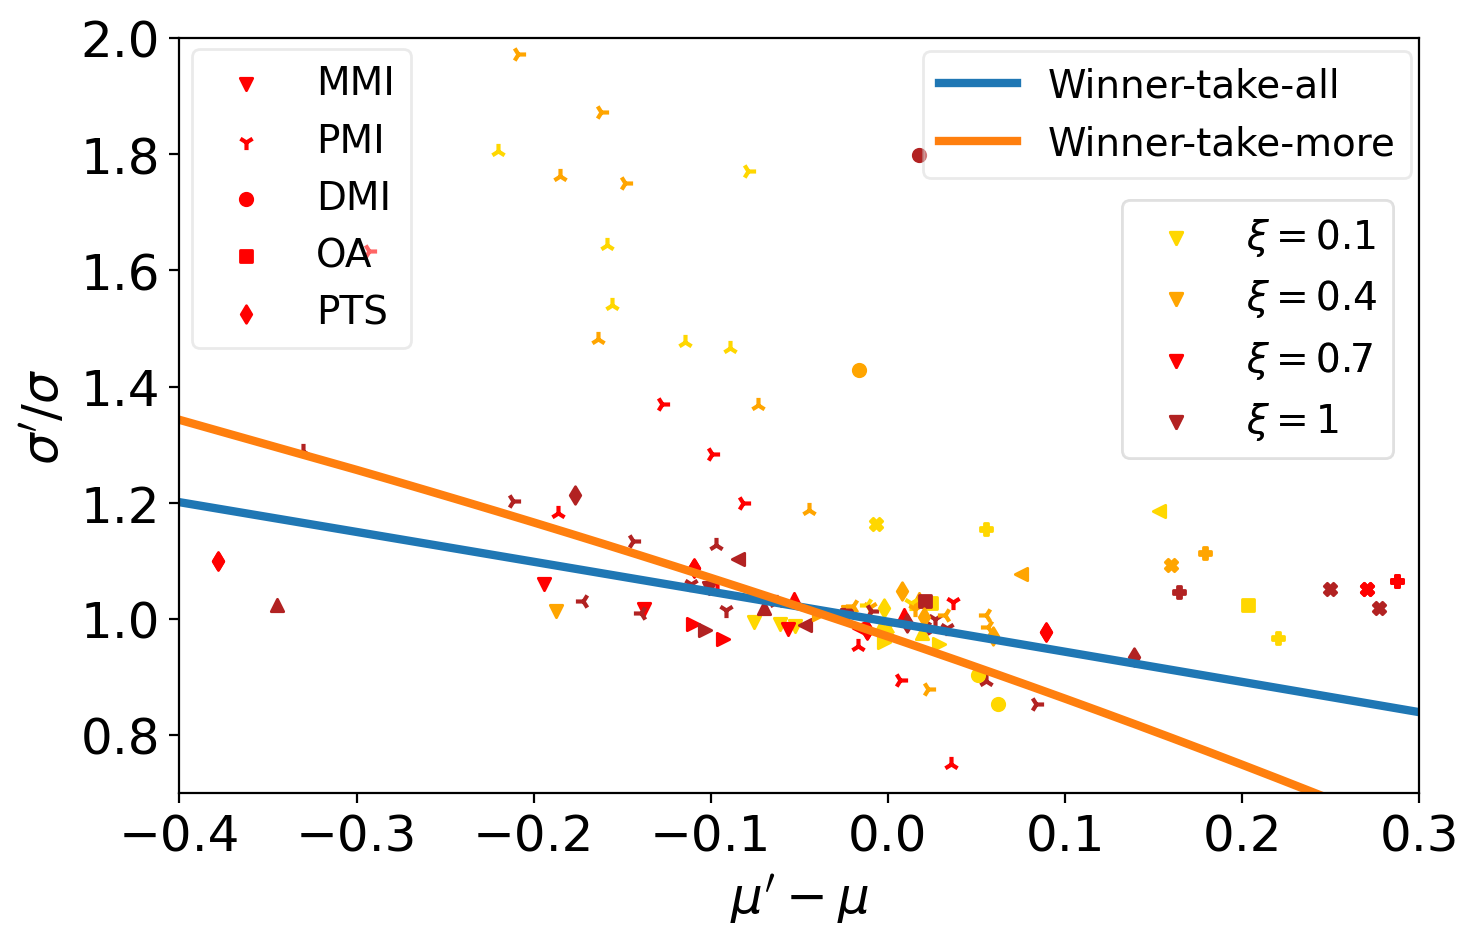

In [87]:
mi = 103
m = 1000
n0 = 5
T = 3000
f = 0
mu_range = np.concatenate([np.arange(-0.3,0.3,0.02), np.arange(0.3,2,0.1), np.arange(2,5,0.5)])
Mechanism = ['TVD','KL','Sqr','Hlg']
plt.figure(figsize=(8,5), dpi= 200)

##################### Fit the thresholds
para = np.polyfit(mu_range, threshold_WTA,4)
def fitted(x,para):
    return para[0]*np.power(x,4)+para[1]*np.power(x,3)+para[2]*np.power(x,2)+para[3]*np.power(x,1)+para[4]*np.power(x,0)
Line_WTA, = plt.plot(-mu_range,fitted(mu_range,para),linewidth=3)

mu_range = np.concatenate([np.arange(-0.3,0.3,0.02), np.arange(0.3,2,0.1), np.arange(2,5,0.5)])
para = np.polyfit(mu_range, threshold_LA,4)
def fitted(x,para):
    return para[0]*np.power(x,4)+para[1]*np.power(x,3)+para[2]*np.power(x,2)+para[3]*np.power(x,1)+para[4]*np.power(x,0)
Line_LA, = plt.plot(-mu_range,fitted(mu_range,para),linewidth=3)


##################### MMI
mean = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_MMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_MMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_mixed.npy')
std = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_MMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
std_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_MMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate_mixed.npy')

Effort_list = [0.1, 0.4, 0.7, 1]
Marker_MMI = ["v","^","<",">"]
Marker_PMI = ["1","2","3","4"]
Color_list_1 = ['gold','orange','red','firebrick','darkred']
Color_list_2 = ['lightskyblue', 'dodgerblue', 'blue', 'navy']
for f in [0,1,2,3]:
    for j, e in enumerate(Effort_list):
        x = ((mean[f,j] - mean_deviate[f,j])/std[f,j]) # Normalize the mean
        y = (std_deviate[f,j]/std[f,j]) # Normalize the std
        x,y = Perato_optimal(x,y) # Only show the points (strategies) that are not dominated by others
        x = -x
        if j == 0 and f == 0:
            MMI_1 = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 1 and f == 0:
            MMI_4 = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 2 and f == 0:
            MMI_7 = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 3 and f == 0:
            MMI_10 = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 2 and f == 1:
            MMI_kl = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 2 and f == 2:
            MMI_sqr = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 2 and f == 3:
            MMI_hlg = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        else:
            plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        
##################### PMI
mean = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_mixed.npy')
variance = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
variance_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate_mixed.npy')

for f in range(4):
    for j, e in enumerate(Effort_list):
        x = ((mean[f,j] - mean_deviate[f,j])/variance[f,j])
        y = (variance_deviate[f,j]/variance[f,j])
        x,y = Perato_optimal(x,y) 
        x = -x
        if j == 2 and f == 0:
            PMI_tvd = plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        elif j == 2 and f == 1:
            PMI_kl = plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        elif j == 2 and f == 2:
            PMI_sqr = plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        elif j == 2 and f == 3:
            PMI_hlg = plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        else:
            plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        
##################### DMI
mean = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_mixed.npy')
variance = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
variance_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate_mixed.npy')

for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[0],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        DMI = plt.scatter(x,y,marker=Marker_list[0],color=Color_list_1[j],s=20,label=Mechanism[f])

        
##################### OA
mean = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_OA/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_OA/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_mixed.npy')
variance = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_OA/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
variance_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_OA/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate_mixed.npy')

for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[1],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        OA = plt.scatter(x,y,marker=Marker_list[1],color=Color_list_1[j],s=20,label=Mechanism[f])
        

##################### PTS
mean = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PTS/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PTS/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_mixed.npy')
variance = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PTS/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
variance_deviate = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PTS/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate_mixed.npy')

for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[2],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        PTS = plt.scatter(x,y,marker=Marker_list[2],color=Color_list_1[j],s=20,label=Mechanism[f])

        
##################### SC-Acc
T = 100
check_prob = 0.2
samples = np.load('Samples/Truthfulness_robustness/W1/Spot_checking_Acc/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples.npy')
samples_deviate = np.load('Samples/Truthfulness_robustness/W1/Spot_checking_Acc/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_deviate.npy')
mean = np.average(samples,axis = 1)
mean_deviate = np.average(samples_deviate,axis = 2)
variance = np.std(samples,axis = 1)
variance_deviate = np.std(samples_deviate,axis = 2)
for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[3],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        SC_Acc = plt.scatter(x,y,marker=Marker_list[3],color=Color_list_1[j],s=20,label=Mechanism[f])
        

##################### SC-DG
samples = np.load('Samples/Truthfulness_robustness/W1/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples.npy')
samples_deviate = np.load('Samples/Truthfulness_robustness/W1/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_deviate.npy')
mean = np.average(samples,axis = 1)
mean_deviate = np.average(samples_deviate,axis = 2)
variance = np.std(samples,axis = 1)
variance_deviate = np.std(samples_deviate,axis = 2)
for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[4],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        SC_DG = plt.scatter(x,y,marker=Marker_list[4],color=Color_list_1[j],s=20,label=Mechanism[f])
        
legend1 = plt.legend([Line_WTA, Line_LA], ['Winner-take-all', 'Winner-take-more'], fontsize=14, loc = (0.6,0.815),framealpha = 0.4)
# legend2 = plt.legend([MMI_7, MMI_kl, MMI_sqr, MMI_hlg], Mechanism, fontsize=14, loc = (0.33,0.665),framealpha = 0.4)
legend2 = plt.legend([MMI_7, PMI_tvd, DMI, OA, PTS], ['MMI', 'PMI', 'DMI', 'OA', 'PTS'], fontsize=14, loc = (0.01,0.59),framealpha = 0.4)
legend3 = plt.legend([MMI_1, MMI_4, MMI_7, MMI_10], [r'$\xi=0.1$',r'$\xi=0.4$',r'$\xi=0.7$',r'$\xi=1$'], fontsize=14, loc = (0.76,0.444),framealpha = 0.4)
# # legend4 = plt.legend([PMI_1, PMI_4, PMI_7, PMI_10], [r'PMI, $\xi=0.1$',r'PMI, $\xi=0.4$',r'PMI, $\xi=0.7$',r'PMI, $\xi=1$'], fontsize=14, loc = (0.01,0.294),framealpha = 0.4)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
# plt.gca().add_artist(legend4)

plt.xlim(-0.4,0.3)
plt.ylim(0.7,2)

plt.tick_params(labelsize=18)
plt.xlabel(r"$\mu'-\mu$", fontsize = 18)
plt.ylabel(r"$\sigma'/\sigma$", fontsize = 18)



Text(0, 0.5, "$\\sigma'/\\sigma$")

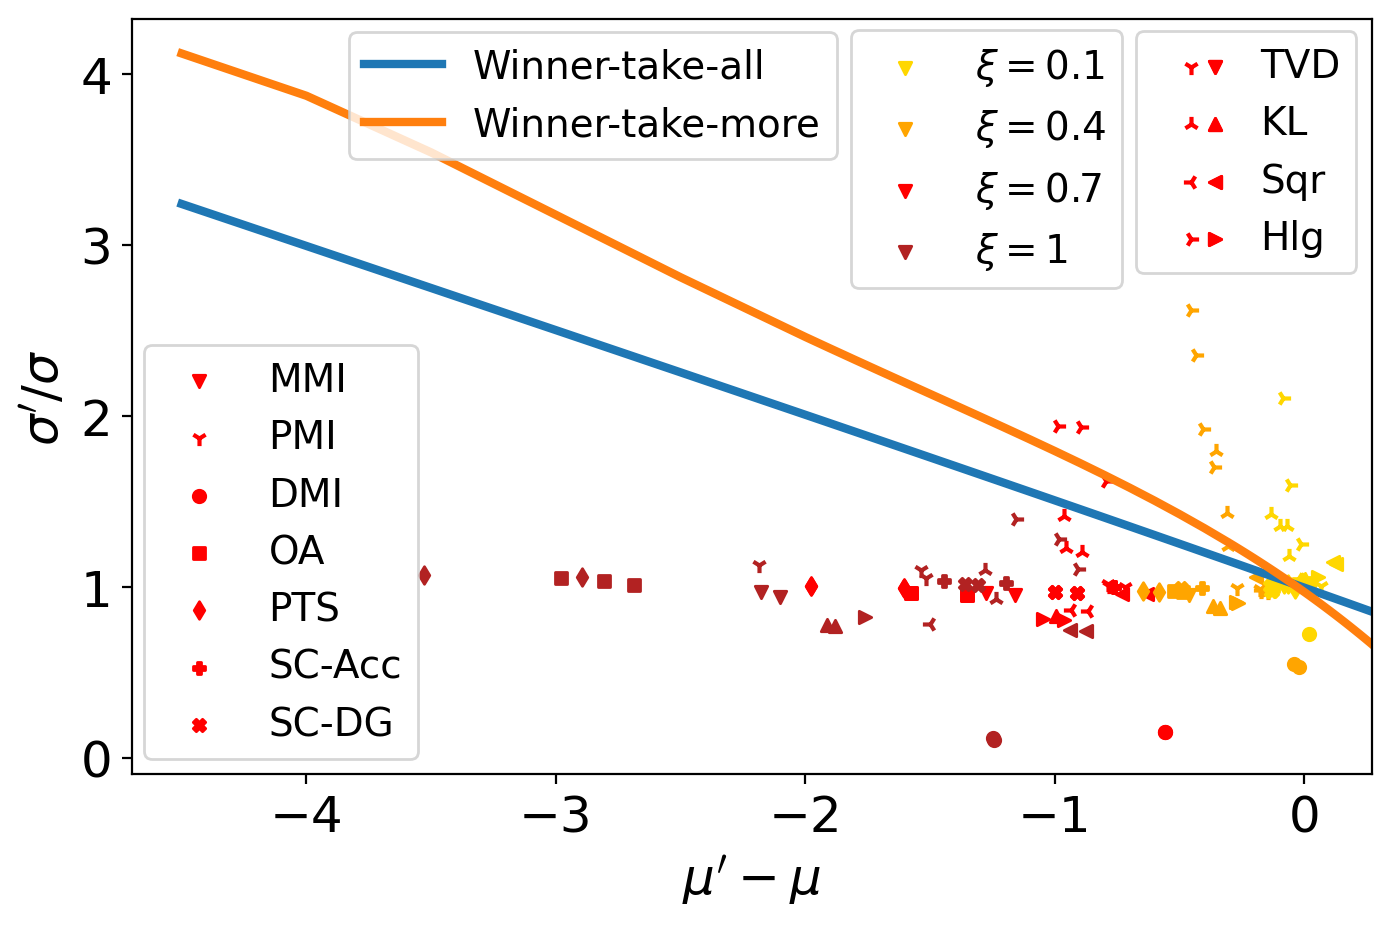

In [76]:
"""
W2
"""

mi = 103
m = 1000
n0 = 5
T = 3000
f = 0
mu_range = np.concatenate([np.arange(-0.3,0.3,0.02), np.arange(0.3,2,0.1), np.arange(2,5,0.5)])
Mechanism = ['TVD','KL','Sqr','Hlg']
plt.figure(figsize=(8,5), dpi= 200)

##################### Fit the thresholds
para = np.polyfit(mu_range, threshold_WTA,4)
def fitted(x,para):
    return para[0]*np.power(x,4)+para[1]*np.power(x,3)+para[2]*np.power(x,2)+para[3]*np.power(x,1)+para[4]*np.power(x,0)
Line_WTA, = plt.plot(-mu_range,fitted(mu_range,para),linewidth=3)

mu_range = np.concatenate([np.arange(-0.3,0.3,0.02), np.arange(0.3,2,0.1), np.arange(2,5,0.5)])
para = np.polyfit(mu_range, threshold_LA,4)
def fitted(x,para):
    return para[0]*np.power(x,4)+para[1]*np.power(x,3)+para[2]*np.power(x,2)+para[3]*np.power(x,1)+para[4]*np.power(x,0)
Line_LA, = plt.plot(-mu_range,fitted(mu_range,para),linewidth=3)


##################### MMI
mean = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_MMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_MMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_mixed.npy')
std = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_MMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
std_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_MMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate_mixed.npy')

Effort_list = [0.1, 0.4, 0.7, 1]
Marker_MMI = ["v","^","<",">"]
Marker_PMI = ["1","2","3","4"]
Color_list_1 = ['gold','orange','red','firebrick','darkred']
Color_list_2 = ['lightskyblue', 'dodgerblue', 'blue', 'navy']
for f in [0,1,2,3]:
    for j, e in enumerate(Effort_list):
        x = ((mean[f,j] - mean_deviate[f,j])/std[f,j]) # Normalize the mean
        y = (std_deviate[f,j]/std[f,j]) # Normalize the std
        x,y = Perato_optimal(x,y) # Only show the points (strategies) that are not dominated by others
        x = -x
        if j == 0 and f == 0:
            MMI_1 = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 1 and f == 0:
            MMI_4 = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 2 and f == 0:
            MMI_7 = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 3 and f == 0:
            MMI_10 = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 2 and f == 1:
            MMI_kl = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 2 and f == 2:
            MMI_sqr = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        elif j == 2 and f == 3:
            MMI_hlg = plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        else:
            plt.scatter(x,y,marker=Marker_MMI[f],color=Color_list_1[j],s=20,label=Mechanism[f])
        
##################### PMI
mean = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_mixed.npy')
variance = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
variance_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate_mixed.npy')

for f in range(4):
    for j, e in enumerate(Effort_list):
        x = ((mean[f,j] - mean_deviate[f,j])/variance[f,j])
        y = (variance_deviate[f,j]/variance[f,j])
        x,y = Perato_optimal(x,y) 
        x = -x
        if j == 2 and f == 0:
            PMI_tvd = plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        elif j == 2 and f == 1:
            PMI_kl = plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        elif j == 2 and f == 2:
            PMI_sqr = plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        elif j == 2 and f == 3:
            PMI_hlg = plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        else:
            plt.scatter(x,y,marker=Marker_PMI[f],color=Color_list_1[j],s=30,label=Mechanism[f])
        
##################### DMI
mean = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_DMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_DMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
variance = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_DMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
variance_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_DMI/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[0],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        DMI = plt.scatter(x,y,marker=Marker_list[0],color=Color_list_1[j],s=20,label=Mechanism[f])

        
##################### OA
mean = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_OA/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_OA/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
variance = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_OA/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
variance_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_OA/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[1],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        OA = plt.scatter(x,y,marker=Marker_list[1],color=Color_list_1[j],s=20,label=Mechanism[f])
        

##################### PTS
mean = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PTS/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PTS/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
variance = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PTS/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
variance_deviate = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PTS/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[2],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        PTS = plt.scatter(x,y,marker=Marker_list[2],color=Color_list_1[j],s=20,label=Mechanism[f])

        
##################### SC-Acc
T = 100
check_prob = 0.2
samples = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_Acc/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples.npy')
samples_deviate = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_Acc/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_deviate.npy')
mean = np.average(samples,axis = 1)
mean_deviate = np.average(samples_deviate,axis = 2)
variance = np.std(samples,axis = 1)
variance_deviate = np.std(samples_deviate,axis = 2)
for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[3],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        SC_Acc = plt.scatter(x,y,marker=Marker_list[3],color=Color_list_1[j],s=20,label=Mechanism[f])
        

##################### SC-DG
samples = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples.npy')
samples_deviate = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_deviate.npy')
mean = np.average(samples,axis = 1)
mean_deviate = np.average(samples_deviate,axis = 2)
variance = np.std(samples,axis = 1)
variance_deviate = np.std(samples_deviate,axis = 2)
for j, e in enumerate(Effort_list):
    x = ((mean[j] - mean_deviate[j])/variance[j])
    y = (variance_deviate[j]/variance[j])
    x,y = Perato_optimal(x,y)
    x = -x
    plt.scatter(x,y,marker=Marker_list[4],color=Color_list_1[j],s=20,label=Mechanism[f])
    if j == 2:
        SC_DG = plt.scatter(x,y,marker=Marker_list[4],color=Color_list_1[j],s=20,label=Mechanism[f])
        
legend1 = plt.legend([Line_WTA, Line_LA], ['Winner-take-all', 'Winner-take-more'], fontsize=14, loc = (0.175,0.815),framealpha = 0.8)
legend2 = plt.legend([MMI_7, PMI_tvd, DMI, OA, PTS, SC_Acc, SC_DG], ['MMI', 'PMI', 'DMI', 'OA', 'PTS', 'SC-Acc', 'SC-DG'], fontsize=14, loc = (0.01,0.02),framealpha = 0.8)
legend3 = plt.legend([MMI_1, MMI_4, MMI_7, MMI_10], [r'$\xi=0.1$',r'$\xi=0.4$',r'$\xi=0.7$',r'$\xi=1$'], fontsize=14, loc = (0.58,0.644),framealpha = 0.8)
legend4 = plt.legend((PMI_tvd, PMI_kl, PMI_sqr, PMI_hlg), 
                      ('TVD','KL','Sqr','Hlg'), fontsize=14, loc = (0.81,0.664),framealpha = 0.8)
legend5 = plt.legend((MMI_7, MMI_kl, MMI_sqr, MMI_hlg), 
                      ('','','',''), fontsize=14, loc = (0.83,0.664),framealpha = 0)
plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
plt.gca().add_artist(legend4)
plt.gca().add_artist(legend5)

plt.xlim(-4.7,0.27)
plt.tick_params(labelsize=18)
plt.xlabel(r"$\mu' - \mu$", fontsize = 18)
plt.ylabel(r"$\sigma'/\sigma$", fontsize = 18)



# 4.  Combining Two Dimensions

Two dimensions together determine the performance of a performance measurement: the sensitivity and the robustness. To measure the robustness, we use the minimum required std of the common shock, denoted as $\sigma_\epsilon$. Then, the new standaed deviation is $\sqrt{\sigma_\tau^2+\sigma_\epsilon^2} =1/\vartheta\cdot \sigma_\tau$. The larger the $\vartheta$ is, the more robust the performance measurement is.

In [127]:
def prob_i(mu_1, mu_2, sig_1, sig_2, i):
    """
    Input: "mu_1"/"mu_2" is the mean of Gaussian before/after the unilateral deviation;
           "sig_1"/"sig_2" is the std of Gaussian before/after the unilateral deviation;
           "i" is the ranking.
    Output: the probability of an agent being ranked at the i'th place after deviation.
    """
    return integrate.quad(lambda x: norm.pdf(x, mu_2, sig_2)*np.power(norm.cdf(x, mu_1, sig_1), n-i)*np.power(1 - norm.cdf(x, mu_1, sig_1), i-1)*comb(n-1,i-1), -np.inf, np.inf)[0]

def find_minimum_shock_WTA(mu_1, mu_2, sig_1, sig_2):
    """
    Input: "mu_1"/"mu_2" is the mean of Gaussian before/after the unilateral untruthful deviation;
           "sig_1"/"sig_2" is the std of Gaussian before/after the unilateral untruthful deviation.
    Output: the minimum common shock that makes the untruthful strategy unpreferred.
    """
    if mu_2 >= mu_1-1e-2*np.abs(mu_1): # deviation brings a larger mean (with a small error)
        return -1

    p1 = prob_i(mu_1, mu_2, sig_1, sig_2, 1)
    if p1 <= 1/n:
        return 0
    high = 10*sig_1
    p1_high = prob_i(mu_1, mu_2, np.sqrt(np.square(sig_1)+np.square(high)), np.sqrt(np.square(sig_2)+np.square(high)), 1)
    while p1_high >= 1/n:
        high *= 10
        p1_high = prob_i(mu_1, mu_2, np.sqrt(np.square(sig_1)+np.square(high)), np.sqrt(np.square(sig_2)+np.square(high)), 1)
    
    low = 0
    while high-low > 1e-3*sig_1:
        mid = (low+high)/2
        p1 = prob_i(mu_1, mu_2, np.sqrt(np.square(sig_1)+np.square(mid)), np.sqrt(np.square(sig_2)+np.square(mid)), 1)
        if p1 > 1/n:
            low = mid
        else:
            high = mid
    return high

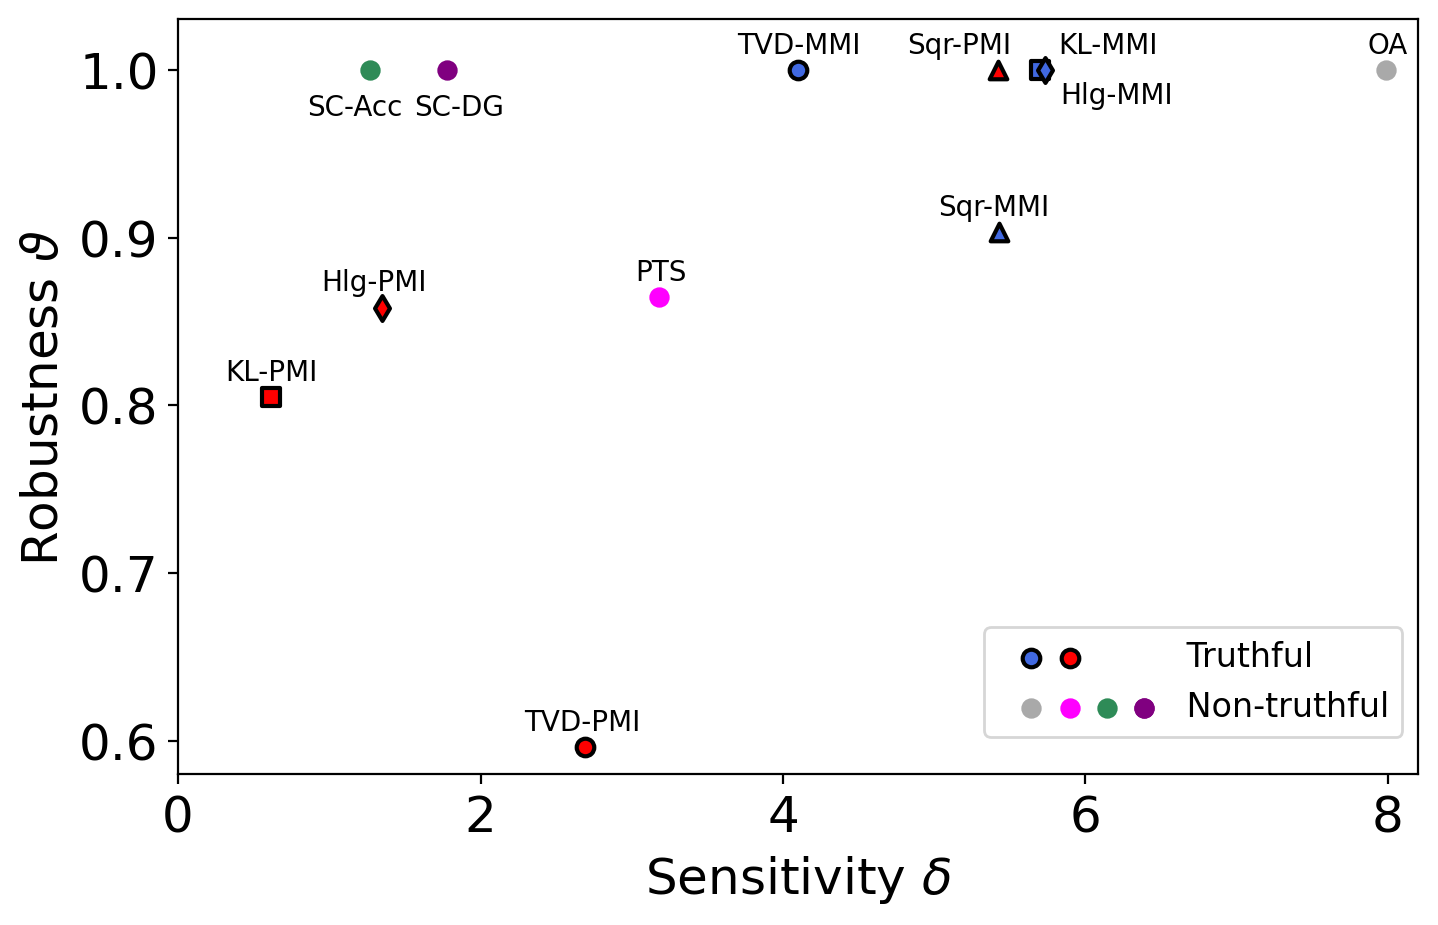

In [134]:
n = 52
n0 = 5
m = 1000
mi = 100
Mechanisms = ['tvd','kl','sqr','hlg']
Mechanism_names = ['TVD','KL','Sqr','Hlg']
Marker_shape = ['o', 's' , '^', 'd']

i = 6 # goal effort = 0.8

plt.figure(figsize=(8,5), dpi= 200)
################### PMI

for f in range(4):
    # compute sensitivity
    T = 100
    mean = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean.npy')
    mean_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate.npy')
    std = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance.npy')
    std_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance_deviate.npy')
    
    delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])
    
    # compute robustness
    T = 3000
    mean_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_larger.npy')
    mean_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate_larger.npy')
    std_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_std_larger.npy')
    std_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_std_deviate_larger.npy')
    
    shock = []
    for s in range(7): # for each untruthful strategy
        shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
    vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))
    
    if f == 0:
        PMI = plt.scatter(delta, vartheta, color = 'red', marker = Marker_shape[f], s = 40, edgecolors='black', linewidth=1.5)
    else:
        plt.scatter(delta, vartheta, color = 'red', marker = Marker_shape[f], s = 40, edgecolors='black', linewidth=1.5)
    if f == 1:
        plt.annotate(Mechanism_names[f]+'-PMI', (delta-0.3, vartheta+0.01), fontsize = 10)
    elif f == 2:
        plt.annotate(Mechanism_names[f]+'-PMI', (delta-0.6, vartheta+0.01), fontsize = 10)
    else:
        plt.annotate(Mechanism_names[f]+'-PMI', (delta-0.4, vartheta+0.01), fontsize = 10)

################### MMI

for f in range(4):
    # compute sensitivity
    T = 100
    mean = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean.npy')
    mean_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate.npy')
    std = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance.npy')
    std_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance_deviate.npy')
    
    delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])
    
    # compute robustness
    T = 3000
    mean_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_larger.npy')
    mean_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate_larger.npy')
    std_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_std_larger.npy')
    std_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_std_deviate_larger.npy')
    
    shock = []
    for s in range(7): # for each untruthful strategy
        shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
    vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))
    
    if f == 0:
        MMI = plt.scatter(delta, vartheta, color = 'royalblue', marker = Marker_shape[f], s = 40, edgecolors='black', linewidth=1.5)
    else:
        plt.scatter(delta, vartheta, color = 'royalblue', marker = Marker_shape[f], s = 40, edgecolors='black', linewidth=1.5)
    if f == 1:
        plt.annotate(Mechanism_names[f]+'-MMI', (delta+0.12, vartheta+0.01), fontsize = 10)
    elif f == 3:
        plt.annotate(Mechanism_names[f]+'-MMI', (delta+0.1, vartheta-0.02), fontsize = 10)
    else:
        plt.annotate(Mechanism_names[f]+'-MMI', (delta-0.4, vartheta+0.01), fontsize = 10)
    
# # ################### DMI

# # # compute sensitivity
# # T = 100
# # mean = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
# # mean_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
# # std = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
# # std_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

# # delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# # # compute robustness
# # T = 3000
# # mean_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_larger.npy')
# # mean_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_larger.npy')
# # std_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_larger.npy')
# # std_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_deviate_larger.npy')

# # shock = []
# # for s in range(7): # for each untruthful strategy
# #     shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
# # vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

# # plt.scatter(delta, vartheta, color = 'gold', marker = 'o', label = 'DMI')    
    
################### PTS

# compute sensitivity
T = 100
mean = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
std_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# compute robustness
T = 3000
mean_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_larger.npy')
mean_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_larger.npy')
std_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_larger.npy')
std_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_deviate_larger.npy')

shock = []
for s in range(7): # for each untruthful strategy
    shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

PTS = plt.scatter(delta, vartheta, color = 'magenta', marker = 'o', s = 40)   
plt.annotate('PTS', (delta-0.16, vartheta+0.01), fontsize = 10)
    
################### OA

# compute sensitivity
T = 100
mean = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
std_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# compute robustness
T = 3000
mean_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_larger.npy')
mean_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_larger.npy')
std_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_larger.npy')
std_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_deviate_larger.npy')

shock = []
for s in range(7): # for each untruthful strategy
    shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

OA = plt.scatter(delta, vartheta, color = 'darkgrey', marker = 'o', s = 40) 
plt.annotate('OA', (delta-0.12, vartheta+0.01), fontsize = 10)

    
################### SC-Acc

# compute sensitivity
T = 100
check_prob = 0.2
mean = np.load('Samples/Effort_equilibrium/W1/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
std = np.load('Samples/Effort_equilibrium/W1/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')

delta = ((mean[12+5*i] - mean[10+5*i]) + (std[12+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# compute robustness
sample_t = np.load('Samples/Truthfulness_robustness/W1/Spot_checking_Acc/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_larger.npy')
sample_u = np.load('Samples/Truthfulness_robustness/W1/Spot_checking_Acc/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_deviate_larger.npy')
mean_t = np.mean(sample_t, axis = 1)
std_t = np.std(sample_t, axis = 1)
mean_u = np.mean(sample_u, axis = 2)
std_u = np.std(sample_u, axis = 2)

shock = []
for s in range(7): # for each untruthful strategy
    shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

SC_Acc = plt.scatter(delta, vartheta, color = 'seagreen', marker = 'o', s = 40)    
plt.annotate('SC-Acc', (delta-0.42, vartheta-0.027), fontsize = 10)

################### SC-DG

# compute sensitivity
T = 100
check_prob = 0.2
mean = np.load('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
std = np.load('Samples/Effort_equilibrium/W1/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')

delta = ((mean[12+5*i] - mean[10+5*i]) + (std[12+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# compute robustness
sample_t = np.load('Samples/Truthfulness_robustness/W1/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_larger.npy')
sample_u = np.load('Samples/Truthfulness_robustness/W1/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_deviate_larger.npy')
mean_t = np.mean(sample_t, axis = 1)
std_t = np.std(sample_t, axis = 1)
mean_u = np.mean(sample_u, axis = 2)
std_u = np.std(sample_u, axis = 2)

shock = []
for s in range(7): # for each untruthful strategy
    shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

SC_DG = plt.scatter(delta, vartheta, color = 'purple', marker = 'o', s = 40)  
plt.annotate('SC-DG', (delta-0.22, vartheta-0.027), fontsize = 10)

plt.tick_params(labelsize=18)
plt.xlabel(r"Sensitivity $\delta$", fontsize = 18)
plt.ylabel(r"Robustness $\vartheta$", fontsize = 18)
plt.xlim(0,8.2)
plt.ylim(0.58,1.03)
legend1 = plt.legend([MMI, OA], ['         Truthful', '         Non-truthful'], loc = (0.65,0.05), fontsize = 12)
legend2 = plt.legend((PMI,), ('',), fontsize=14, loc = (0.675,0.11),framealpha = 0)
legend3 = plt.legend((PTS,), ('',), fontsize=14, loc = (0.675,0.043),framealpha = 0)
legend4 = plt.legend((SC_Acc,), ('',), fontsize=14, loc = (0.705,0.043),framealpha = 0)
legend5 = plt.legend((SC_DG,), ('',), fontsize=14, loc = (0.735,0.043),framealpha = 0)

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
plt.gca().add_artist(legend4)
plt.gca().add_artist(legend5)


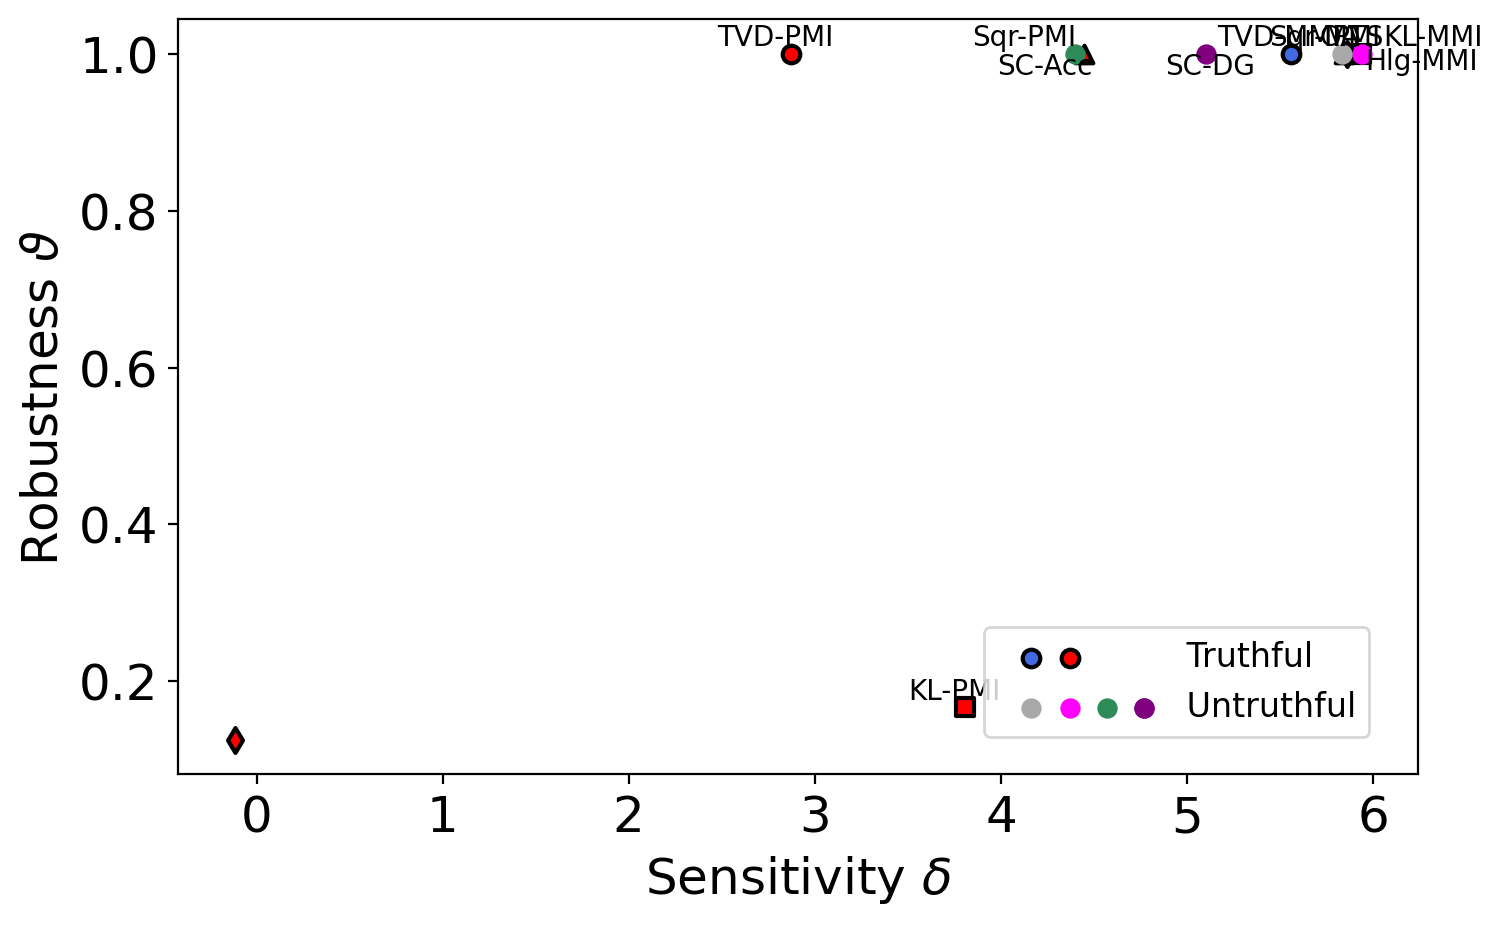

In [131]:
n = 52
n0 = 5
m = 1000
mi = 100
Mechanisms = ['tvd','kl','sqr','hlg']
Mechanism_names = ['TVD','KL','Sqr','Hlg']
Marker_shape = ['o', 's' , '^', 'd']

i = 3 # goal effort = 0.6

plt.figure(figsize=(8,5), dpi= 200)
################### PMI

for f in range(4):
    # compute sensitivity
    T = 100
    mean = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean.npy')
    mean_d = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate.npy')
    std = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance.npy')
    std_d = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance_deviate.npy')
    
    delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])
    
    # compute robustness
    T = 3000
    mean_t = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_larger.npy')
    mean_u = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate_larger.npy')
    std_t = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_std_larger.npy')
    std_u = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_std_deviate_larger.npy')
    
    shock = []
    for s in range(7): # for each untruthful strategy
        shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
    vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))
    
    if f == 0:
        PMI = plt.scatter(delta, vartheta, color = 'red', marker = Marker_shape[f], s = 40, edgecolors='black', linewidth=1.5)
    else:
        plt.scatter(delta, vartheta, color = 'red', marker = Marker_shape[f], s = 40, edgecolors='black', linewidth=1.5)
    if f == 1:
        plt.annotate(Mechanism_names[f]+'-PMI', (delta-0.3, vartheta+0.01), fontsize = 10)
    elif f == 2:
        plt.annotate(Mechanism_names[f]+'-PMI', (delta-0.6, vartheta+0.01), fontsize = 10)
    else:
        plt.annotate(Mechanism_names[f]+'-PMI', (delta-0.4, vartheta+0.01), fontsize = 10)

################### MMI

for f in range(4):
    # compute sensitivity
    T = 100
    mean = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean.npy')
    mean_d = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate.npy')
    std = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance.npy')
    std_d = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_variance_deviate.npy')
    
    delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])
    
    # compute robustness
    T = 3000
    mean_t = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_larger.npy')
    mean_u = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_mean_deviate_larger.npy')
    std_t = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_std_larger.npy')
    std_u = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_MMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mechanism_'+Mechanisms[f]+'_std_deviate_larger.npy')
    
    shock = []
    for s in range(7): # for each untruthful strategy
        shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
    vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))
    
    if f == 0:
        MMI = plt.scatter(delta, vartheta, color = 'royalblue', marker = Marker_shape[f], s = 40, edgecolors='black', linewidth=1.5)
    else:
        plt.scatter(delta, vartheta, color = 'royalblue', marker = Marker_shape[f], s = 40, edgecolors='black', linewidth=1.5)
    if f == 1:
        plt.annotate(Mechanism_names[f]+'-MMI', (delta+0.12, vartheta+0.01), fontsize = 10)
    elif f == 3:
        plt.annotate(Mechanism_names[f]+'-MMI', (delta+0.1, vartheta-0.02), fontsize = 10)
    else:
        plt.annotate(Mechanism_names[f]+'-MMI', (delta-0.4, vartheta+0.01), fontsize = 10)
    
# # ################### DMI

# # # compute sensitivity
# # T = 100
# # mean = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
# # mean_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
# # std = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
# # std_d = np.load('Samples/Effort_equilibrium/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

# # delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# # # compute robustness
# # T = 3000
# # mean_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_larger.npy')
# # mean_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_larger.npy')
# # std_t = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_larger.npy')
# # std_u = np.load('Samples/Truthfulness_robustness/W1/Peer_prediction_DMI/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_deviate_larger.npy')

# # shock = []
# # for s in range(7): # for each untruthful strategy
# #     shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
# # vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

# # plt.scatter(delta, vartheta, color = 'gold', marker = 'o', label = 'DMI')    
    
################### PTS

# compute sensitivity
T = 100
mean = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_d = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
std_d = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# compute robustness
T = 3000
mean_t = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_larger.npy')
mean_u = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_larger.npy')
std_t = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_larger.npy')
std_u = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_PTS/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_deviate_larger.npy')

shock = []
for s in range(7): # for each untruthful strategy
    shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

PTS = plt.scatter(delta, vartheta, color = 'magenta', marker = 'o', s = 40)   
plt.annotate('PTS', (delta-0.16, vartheta+0.01), fontsize = 10)
    
################### OA

# compute sensitivity
T = 100
mean = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean.npy')
mean_d = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate.npy')
std = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance.npy')
std_d = np.load('Samples/Effort_equilibrium/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_variance_deviate.npy')

delta = ((mean_d[10+5*i] - mean[10+5*i]) + (std_d[10+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# compute robustness
T = 3000
mean_t = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_larger.npy')
mean_u = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_mean_deviate_larger.npy')
std_t = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_larger.npy')
std_u = np.load('Samples/Truthfulness_robustness/W2/Peer_prediction_OA/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_std_deviate_larger.npy')

shock = []
for s in range(7): # for each untruthful strategy
    shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

OA = plt.scatter(delta, vartheta, color = 'darkgrey', marker = 'o', s = 40) 
plt.annotate('OA', (delta-0.12, vartheta+0.01), fontsize = 10)

    
################### SC-Acc

# compute sensitivity
T = 100
check_prob = 0.2
mean = np.load('Samples/Effort_equilibrium/W2/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
std = np.load('Samples/Effort_equilibrium/W2/Spot_check_Acc/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')

delta = ((mean[12+5*i] - mean[10+5*i]) + (std[12+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# compute robustness
sample_t = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_Acc/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_larger.npy')
sample_u = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_Acc/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_deviate_larger.npy')
mean_t = np.mean(sample_t, axis = 1)
std_t = np.std(sample_t, axis = 1)
mean_u = np.mean(sample_u, axis = 2)
std_u = np.std(sample_u, axis = 2)

shock = []
for s in range(7): # for each untruthful strategy
    shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

SC_Acc = plt.scatter(delta, vartheta, color = 'seagreen', marker = 'o', s = 40)    
plt.annotate('SC-Acc', (delta-0.42, vartheta-0.027), fontsize = 10)

################### SC-DG

# compute sensitivity
T = 100
check_prob = 0.2
mean = np.load('Samples/Effort_equilibrium/W2/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_mean.npy')
std = np.load('Samples/Effort_equilibrium/W2/Spot_check_DG/m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_p)+'_variance.npy')

delta = ((mean[12+5*i] - mean[10+5*i]) + (std[12+5*i] - std[10+5*i]))/(0.04*std[10+5*i])

# compute robustness
sample_t = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_larger.npy')
sample_u = np.load('Samples/Truthfulness_robustness/W2/Spot_checking_DG/strategic_m'+str(m)+'_mi'+str(mi)+'_n0'+str(n0)+'_T'+str(T)+'_check_p_'+str(check_prob)+'_samples_deviate_larger.npy')
mean_t = np.mean(sample_t, axis = 1)
std_t = np.std(sample_t, axis = 1)
mean_u = np.mean(sample_u, axis = 2)
std_u = np.std(sample_u, axis = 2)

shock = []
for s in range(7): # for each untruthful strategy
    shock.append(find_minimum_shock_WTA(mean_t[i], mean_u[i,s], std_t[i], std_u[i,s])) # i = 6: fix effort xi = 0.8
vartheta = 1/np.sqrt(1 + np.square(np.max(shock)/std_t[i]))

SC_DG = plt.scatter(delta, vartheta, color = 'purple', marker = 'o', s = 40)  
plt.annotate('SC-DG', (delta-0.22, vartheta-0.027), fontsize = 10)

plt.tick_params(labelsize=18)
plt.xlabel(r"Sensitivity $\delta$", fontsize = 18)
plt.ylabel(r"Robustness $\vartheta$", fontsize = 18)
# plt.xlim(0,8.2)
# plt.ylim(0.58,1.03)
legend1 = plt.legend([MMI, OA], ['         Truthful', '         Untruthful'], loc = (0.65,0.05), fontsize = 12)
legend2 = plt.legend((PMI,), ('',), fontsize=14, loc = (0.675,0.11),framealpha = 0)
legend3 = plt.legend((PTS,), ('',), fontsize=14, loc = (0.675,0.043),framealpha = 0)
legend4 = plt.legend((SC_Acc,), ('',), fontsize=14, loc = (0.705,0.043),framealpha = 0)
legend5 = plt.legend((SC_DG,), ('',), fontsize=14, loc = (0.735,0.043),framealpha = 0)

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
plt.gca().add_artist(legend4)
plt.gca().add_artist(legend5)
